# Chennai House Price Prediction

dataset link- https://www.kaggle.com/code/kunwarakash/chennai-house-price-prediction/input

In [180]:
# importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,LassoCV,Ridge,RidgeCV,ElasticNet,ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error

In [2]:
os.chdir('F:\Data Science\Chennai House Price Predicton')

In [3]:
# read csv file

df = pd.read_csv("Chennai houseing sale.csv")

In [4]:
# top 5 rows

df.head()

PRT_ID        AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  \
0  P03210  Karapakkam      1004  04-05-2011            131        1.0   
1  P09411  Anna Nagar      1986  19-12-2006             26        2.0   
2  P01812       Adyar       909  04-02-2012             70        1.0   
3  P05346   Velachery      1855  13-03-2010             14        3.0   
4  P06210  Karapakkam      1226  05-10-2009             84        1.0   

   N_BATHROOM  N_ROOM SALE_COND PARK_FACIL  ... UTILITY_AVAIL  STREET MZZONE  \
0         1.0       3  AbNormal        Yes  ...        AllPub   Paved      A   
1         1.0       5  AbNormal         No  ...        AllPub  Gravel     RH   
2         1.0       3  AbNormal        Yes  ...           ELO  Gravel     RL   
3         2.0       5    Family         No  ...       NoSewr    Paved      I   
4         1.0       3  AbNormal        Yes  ...        AllPub  Gravel      C   

  QS_ROOMS QS_BATHROOM  QS_BEDROOM  QS_OVERALL  REG_FEE  COMMIS  SALES_PRICE  
0      4.0         3.9         4.9       4.330   380000  144400      7600000  
1      4.9         4.2         2.5       3.765   760122  304049     21717770  
2      4.1         3.8         2.2       3.090   421094   92114     13159200  
3      4.7         3.9         3.6       4.010   356321   77042      9630290  
4      3.0         2.5         4.1       3.290   237000   74063      7406250  

[5 rows x 22 columns]

In [5]:
#shape of data

df.shape

(7109, 22)

In [6]:
# Checking basic dataset information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [7]:
# column names in dataset

df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

#### About Data
* PRT_ID- Id of house
* AREA - In which area house is located in Chennai
* INT_SQFT- Area in sqft
* DATE_SALE- When house was sold
* DIST_MAINROAD- Distance of house from main road
* N_BEDROOM- Number of Bedrooms
* N_BATHROOM- Number of Bathrooms
* N_ROOM- Number of Rooms
* SALE_COND- Sale condition
* PARK_FACIL- Is parking available or not
* DATE_BUILD- Date house was built
* BUILDTYPE- Purpose of house
* UTILITY_AVAIL- Facilities available there
* STREET- How is street outside that house
* MZZONE- Which zone it is in
* QS_ROOMS- It is masked data
* QS_BATHROOM- It is masked data
* QS_BEDROOM- It is masked data
* QS_OVERALL- It is masked data
* REG_FEE- Registration fee after sales
* COMMIS- Commission fee after sales
* SALES_PRICE- Sale price of house


#### 1. How many numerical columns and catgorical columns are there in data ?

In [8]:
# All numeric columns are :

print(df.select_dtypes(include=np.number).columns)
print("No. of Numerical columns are :",len(df.select_dtypes(include=np.number).columns))

Index(['INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM',
       'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE',
       'COMMIS', 'SALES_PRICE'],
      dtype='object')
No. of Numerical columns are : 12


In [9]:
# All categorical columns are :

print(df.select_dtypes(include=object).columns)
print(" No. of categorical columns are :",len(df.select_dtypes(include=object).columns))

Index(['PRT_ID', 'AREA', 'DATE_SALE', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE'],
      dtype='object')
 No. of categorical columns are : 10


In [10]:
# 'MZZONE' Value_counts

df['MZZONE'].value_counts()

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: MZZONE, dtype: int64

## DATA CLEANING

In [11]:
# as per general understanding dropping non-relevant columns from data- Masked data(removing)

df = df.drop(['QS_ROOMS','QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL'], axis=1)

In [12]:
# checking dataset after removing columns

df.head()

PRT_ID        AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  \
0  P03210  Karapakkam      1004  04-05-2011            131        1.0   
1  P09411  Anna Nagar      1986  19-12-2006             26        2.0   
2  P01812       Adyar       909  04-02-2012             70        1.0   
3  P05346   Velachery      1855  13-03-2010             14        3.0   
4  P06210  Karapakkam      1226  05-10-2009             84        1.0   

   N_BATHROOM  N_ROOM SALE_COND PARK_FACIL  DATE_BUILD   BUILDTYPE  \
0         1.0       3  AbNormal        Yes  15-05-1967  Commercial   
1         1.0       5  AbNormal         No  22-12-1995  Commercial   
2         1.0       3  AbNormal        Yes  09-02-1992  Commercial   
3         2.0       5    Family         No  18-03-1988      Others   
4         1.0       3  AbNormal        Yes  13-10-1979      Others   

  UTILITY_AVAIL  STREET MZZONE  REG_FEE  COMMIS  SALES_PRICE  
0        AllPub   Paved      A   380000  144400      7600000  
1        AllPub  Gravel     RH   760122  304049     21717770  
2           ELO  Gravel     RL   421094   92114     13159200  
3       NoSewr    Paved      I   356321   77042      9630290  
4        AllPub  Gravel      C   237000   74063      7406250

#### 2. which column has missing values present ?

In [13]:
# checking null values in dataset 

df.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        1
N_BATHROOM       5
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

##### N_BEDROOM, N_BATHROOM columns has missing values 

In [14]:
#checking no. of bathrooms in each house

df['N_BATHROOM'].value_counts()

1.0    5589
2.0    1515
Name: N_BATHROOM, dtype: int64

In [15]:
#filling Number of bathroom null value using mode value of bathrooms

df['N_BATHROOM'] = df['N_BATHROOM'].fillna(df['N_BATHROOM'].mode()[0])

In [16]:
#checking number of bedrooms available in houses

df['N_BEDROOM'].value_counts()

1.0    3795
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

In [17]:
# dropping null Number of bedroom row

df.dropna(inplace= True)

In [18]:
# checking null value in dataset after null values operation

df.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [19]:
#checking dataset after

df.head()

PRT_ID        AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  \
0  P03210  Karapakkam      1004  04-05-2011            131        1.0   
1  P09411  Anna Nagar      1986  19-12-2006             26        2.0   
2  P01812       Adyar       909  04-02-2012             70        1.0   
3  P05346   Velachery      1855  13-03-2010             14        3.0   
4  P06210  Karapakkam      1226  05-10-2009             84        1.0   

   N_BATHROOM  N_ROOM SALE_COND PARK_FACIL  DATE_BUILD   BUILDTYPE  \
0         1.0       3  AbNormal        Yes  15-05-1967  Commercial   
1         1.0       5  AbNormal         No  22-12-1995  Commercial   
2         1.0       3  AbNormal        Yes  09-02-1992  Commercial   
3         2.0       5    Family         No  18-03-1988      Others   
4         1.0       3  AbNormal        Yes  13-10-1979      Others   

  UTILITY_AVAIL  STREET MZZONE  REG_FEE  COMMIS  SALES_PRICE  
0        AllPub   Paved      A   380000  144400      7600000  
1        AllPub  Gravel     RH   760122  304049     21717770  
2           ELO  Gravel     RL   421094   92114     13159200  
3       NoSewr    Paved      I   356321   77042      9630290  
4        AllPub  Gravel      C   237000   74063      7406250

#

## Feature Engineering

In [20]:
#adding Commision , registration fee and sales price column to create 'Total sales price column'

df['TOTAL_SALES_PRICE'] = df['SALES_PRICE'] + df['COMMIS'] + df['REG_FEE']

In [21]:
#checking dataset now

df.head()

PRT_ID        AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  \
0  P03210  Karapakkam      1004  04-05-2011            131        1.0   
1  P09411  Anna Nagar      1986  19-12-2006             26        2.0   
2  P01812       Adyar       909  04-02-2012             70        1.0   
3  P05346   Velachery      1855  13-03-2010             14        3.0   
4  P06210  Karapakkam      1226  05-10-2009             84        1.0   

   N_BATHROOM  N_ROOM SALE_COND PARK_FACIL  DATE_BUILD   BUILDTYPE  \
0         1.0       3  AbNormal        Yes  15-05-1967  Commercial   
1         1.0       5  AbNormal         No  22-12-1995  Commercial   
2         1.0       3  AbNormal        Yes  09-02-1992  Commercial   
3         2.0       5    Family         No  18-03-1988      Others   
4         1.0       3  AbNormal        Yes  13-10-1979      Others   

  UTILITY_AVAIL  STREET MZZONE  REG_FEE  COMMIS  SALES_PRICE  \
0        AllPub   Paved      A   380000  144400      7600000   
1        AllPub  Gravel     RH   760122  304049     21717770   
2           ELO  Gravel     RL   421094   92114     13159200   
3       NoSewr    Paved      I   356321   77042      9630290   
4        AllPub  Gravel      C   237000   74063      7406250   

   TOTAL_SALES_PRICE  
0            8124400  
1           22781941  
2           13672408  
3           10063653  
4            7717313

In [22]:
#checking unique values in INT_SQFTcolumn

df['INT_SQFT'].value_counts()


1781    18
1538    15
1505    13
1514    13
1655    12
        ..
559      1
2479     1
1330     1
880      1
598      1
Name: INT_SQFT, Length: 1699, dtype: int64

In [23]:
df['DATE_BUILD']

0       15-05-1967
1       22-12-1995
2       09-02-1992
3       18-03-1988
4       13-10-1979
           ...    
7104    15-01-1962
7105    11-04-1995
7106    01-09-1978
7107    11-08-1977
7108    24-07-1961
Name: DATE_BUILD, Length: 7108, dtype: object

In [24]:
# function to create  BUILD YEAR Column of dataset from DATE BUILD column 

def convert(x):
    num = x.split('-')[2]
    return num

In [25]:
#creating copy of dataset

df2 = df.copy() 

In [26]:
# Creatig 'BUILD YEAR' Column from 'DATE BUILD'

df2['BUILD YEAR'] = df2['DATE_BUILD'].apply(convert)

In [27]:
# Creatig 'SALE_YEAR' Column from 'DATE_SALE'

df2['SALE_YEAR'] = df['DATE_SALE'].apply(convert)

In [28]:
df2.head()

PRT_ID        AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  \
0  P03210  Karapakkam      1004  04-05-2011            131        1.0   
1  P09411  Anna Nagar      1986  19-12-2006             26        2.0   
2  P01812       Adyar       909  04-02-2012             70        1.0   
3  P05346   Velachery      1855  13-03-2010             14        3.0   
4  P06210  Karapakkam      1226  05-10-2009             84        1.0   

   N_BATHROOM  N_ROOM SALE_COND PARK_FACIL  ...   BUILDTYPE UTILITY_AVAIL  \
0         1.0       3  AbNormal        Yes  ...  Commercial        AllPub   
1         1.0       5  AbNormal         No  ...  Commercial        AllPub   
2         1.0       3  AbNormal        Yes  ...  Commercial           ELO   
3         2.0       5    Family         No  ...      Others       NoSewr    
4         1.0       3  AbNormal        Yes  ...      Others        AllPub   

   STREET MZZONE REG_FEE  COMMIS  SALES_PRICE  TOTAL_SALES_PRICE  BUILD YEAR  \
0   Paved      A  380000  144400      7600000            8124400        1967   
1  Gravel     RH  760122  304049     21717770           22781941        1995   
2  Gravel     RL  421094   92114     13159200           13672408        1992   
3   Paved      I  356321   77042      9630290           10063653        1988   
4  Gravel      C  237000   74063      7406250            7717313        1979   

  SALE_YEAR  
0      2011  
1      2006  
2      2012  
3      2010  
4      2009  

[5 rows x 21 columns]

In [29]:
# Converting DATE sale in datetime format

df2['DATE_SALE'] = pd.to_datetime(df2['DATE_SALE'])

C:\Users\HP\AppData\Local\Temp\ipykernel_9156\2330758434.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df2['DATE_SALE'] = pd.to_datetime(df2['DATE_SALE'])


In [30]:
#checking datatype of df2
df2.dtypes

PRT_ID                       object
AREA                         object
INT_SQFT                      int64
DATE_SALE            datetime64[ns]
DIST_MAINROAD                 int64
N_BEDROOM                   float64
N_BATHROOM                  float64
N_ROOM                        int64
SALE_COND                    object
PARK_FACIL                   object
DATE_BUILD                   object
BUILDTYPE                    object
UTILITY_AVAIL                object
STREET                       object
MZZONE                       object
REG_FEE                       int64
COMMIS                        int64
SALES_PRICE                   int64
TOTAL_SALES_PRICE             int64
BUILD YEAR                   object
SALE_YEAR                    object
dtype: object

In [31]:
#checking details of datset

df2.describe(include='all')

C:\Users\HP\AppData\Local\Temp\ipykernel_9156\1016192461.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df2.describe(include='all')


PRT_ID      AREA     INT_SQFT            DATE_SALE  DIST_MAINROAD  \
count     7108      7108  7108.000000                 7108    7108.000000   
unique    7108        17          NaN                 2798            NaN   
top     P03210  Chrompet          NaN  2009-06-10 00:00:00            NaN   
freq         1      1681          NaN                   12            NaN   
first      NaN       NaN          NaN  2004-01-02 00:00:00            NaN   
last       NaN       NaN          NaN  2015-12-02 00:00:00            NaN   
mean       NaN       NaN  1382.048537                  NaN      99.591728   
std        NaN       NaN   457.438429                  NaN      57.399027   
min        NaN       NaN   500.000000                  NaN       0.000000   
25%        NaN       NaN   993.000000                  NaN      50.000000   
50%        NaN       NaN  1373.000000                  NaN      99.000000   
75%        NaN       NaN  1744.000000                  NaN     148.000000   
max        NaN       NaN  2500.000000                  NaN     200.000000   

          N_BEDROOM   N_BATHROOM       N_ROOM SALE_COND PARK_FACIL  ...  \
count   7108.000000  7108.000000  7108.000000      7108       7108  ...   
unique          NaN          NaN          NaN         9          3  ...   
top             NaN          NaN          NaN   AdjLand        Yes  ...   
freq            NaN          NaN          NaN      1433       3587  ...   
first           NaN          NaN          NaN       NaN        NaN  ...   
last            NaN          NaN          NaN       NaN        NaN  ...   
mean       1.637029     1.213140     3.688661       NaN        NaN  ...   
std        0.802902     0.409555     1.019164       NaN        NaN  ...   
min        1.000000     1.000000     2.000000       NaN        NaN  ...   
25%        1.000000     1.000000     3.000000       NaN        NaN  ...   
50%        1.000000     1.000000     4.000000       NaN        NaN  ...   
75%        2.000000     1.000000     4.000000       NaN        NaN  ...   
max        4.000000     2.000000     6.000000       NaN        NaN  ...   

       BUILDTYPE UTILITY_AVAIL STREET MZZONE        REG_FEE         COMMIS  \
count       7108          7108   7108   7108    7108.000000    7108.000000   
unique         5             5      5      6            NaN            NaN   
top        House        AllPub  Paved     RL            NaN            NaN   
freq        2443          1886   2560   1858            NaN            NaN   
first        NaN           NaN    NaN    NaN            NaN            NaN   
last         NaN           NaN    NaN    NaN            NaN            NaN   
mean         NaN           NaN    NaN    NaN  376947.306837  141010.373101   
std          NaN           NaN    NaN    NaN  143078.725243   78772.660739   
min          NaN           NaN    NaN    NaN   71177.000000    5055.000000   
25%          NaN           NaN    NaN    NaN  272398.500000   84212.750000   
50%          NaN           NaN    NaN    NaN  349497.500000  127631.500000   
75%          NaN           NaN    NaN    NaN  451583.000000  184512.250000   
max          NaN           NaN    NaN    NaN  983922.000000  495405.000000   

         SALES_PRICE  TOTAL_SALES_PRICE  BUILD YEAR SALE_YEAR  
count   7.108000e+03       7.108000e+03        7108      7108  
unique           NaN                NaN          62        12  
top              NaN                NaN        1985      2010  
freq             NaN                NaN         200      1341  
first            NaN                NaN         NaN       NaN  
last             NaN                NaN         NaN       NaN  
mean    1.089492e+07       1.141288e+07         NaN       NaN  
std     3.768868e+06       3.945234e+06         NaN       NaN  
min     2.156875e+06       2.253935e+06         NaN       NaN  
25%     8.271875e+06       8.645638e+06         NaN       NaN  
50%     1.033484e+07       1.081953e+07         NaN       NaN  
75%     1.299406e

##### 3. Are there misspelled data ?

In [32]:
#checking uniqueness in SALE_COND column

df2['SALE_COND'].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [33]:
# as Abnormal = Ab normal, Partial = PartialL and adjLAND = Adj Land
# we will clean this column by merging duplicate values

df2['SALE_COND'] = df2['SALE_COND'].replace({'Ab Normal': 'AbNormal', 'Partiall': 'Partial','PartiaLl':'Partial','Adj Land':'AdjLand'})

In [34]:
df2['SALE_COND'].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale'],
      dtype=object)

In [35]:
# Checking new df2

df2.head()

PRT_ID        AREA  INT_SQFT  DATE_SALE  DIST_MAINROAD  N_BEDROOM  \
0  P03210  Karapakkam      1004 2011-04-05            131        1.0   
1  P09411  Anna Nagar      1986 2006-12-19             26        2.0   
2  P01812       Adyar       909 2012-04-02             70        1.0   
3  P05346   Velachery      1855 2010-03-13             14        3.0   
4  P06210  Karapakkam      1226 2009-05-10             84        1.0   

   N_BATHROOM  N_ROOM SALE_COND PARK_FACIL  ...   BUILDTYPE UTILITY_AVAIL  \
0         1.0       3  AbNormal        Yes  ...  Commercial        AllPub   
1         1.0       5  AbNormal         No  ...  Commercial        AllPub   
2         1.0       3  AbNormal        Yes  ...  Commercial           ELO   
3         2.0       5    Family         No  ...      Others       NoSewr    
4         1.0       3  AbNormal        Yes  ...      Others        AllPub   

   STREET MZZONE REG_FEE  COMMIS  SALES_PRICE  TOTAL_SALES_PRICE  BUILD YEAR  \
0   Paved      A  380000  144400      7600000            8124400        1967   
1  Gravel     RH  760122  304049     21717770           22781941        1995   
2  Gravel     RL  421094   92114     13159200           13672408        1992   
3   Paved      I  356321   77042      9630290           10063653        1988   
4  Gravel      C  237000   74063      7406250            7717313        1979   

  SALE_YEAR  
0      2011  
1      2006  
2      2012  
3      2010  
4      2009  

[5 rows x 21 columns]

In [36]:
#Checking unique values

df2['PARK_FACIL'].value_counts()

Yes    3587
No     3519
Noo       2
Name: PARK_FACIL, dtype: int64

In [37]:
# replacing 'Noo' by No in dataframe

df2['PARK_FACIL'] = df2['PARK_FACIL'].replace('Noo','No')

In [38]:
df2['PARK_FACIL'].value_counts()

Yes    3587
No     3521
Name: PARK_FACIL, dtype: int64

In [39]:
#Checking unique values

df2['BUILDTYPE'].value_counts()

House         2443
Commercial    2325
Others        2310
Other           26
Comercial        4
Name: BUILDTYPE, dtype: int64

In [40]:
# replacing comercial by Commercial and Other by Others

df2['BUILDTYPE'] = df2['BUILDTYPE'].replace({'Comercial':'Commercial','Other':'Others'})

In [41]:
df2['BUILDTYPE'].value_counts()

House         2443
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

In [42]:
# creating copy of dataframe df3

df3 = df2.copy()

In [43]:
df3.head()

PRT_ID        AREA  INT_SQFT  DATE_SALE  DIST_MAINROAD  N_BEDROOM  \
0  P03210  Karapakkam      1004 2011-04-05            131        1.0   
1  P09411  Anna Nagar      1986 2006-12-19             26        2.0   
2  P01812       Adyar       909 2012-04-02             70        1.0   
3  P05346   Velachery      1855 2010-03-13             14        3.0   
4  P06210  Karapakkam      1226 2009-05-10             84        1.0   

   N_BATHROOM  N_ROOM SALE_COND PARK_FACIL  ...   BUILDTYPE UTILITY_AVAIL  \
0         1.0       3  AbNormal        Yes  ...  Commercial        AllPub   
1         1.0       5  AbNormal         No  ...  Commercial        AllPub   
2         1.0       3  AbNormal        Yes  ...  Commercial           ELO   
3         2.0       5    Family         No  ...      Others       NoSewr    
4         1.0       3  AbNormal        Yes  ...      Others        AllPub   

   STREET MZZONE REG_FEE  COMMIS  SALES_PRICE  TOTAL_SALES_PRICE  BUILD YEAR  \
0   Paved      A  380000  144400      7600000            8124400        1967   
1  Gravel     RH  760122  304049     21717770           22781941        1995   
2  Gravel     RL  421094   92114     13159200           13672408        1992   
3   Paved      I  356321   77042      9630290           10063653        1988   
4  Gravel      C  237000   74063      7406250            7717313        1979   

  SALE_YEAR  
0      2011  
1      2006  
2      2012  
3      2010  
4      2009  

[5 rows x 21 columns]

In [44]:
#Checking unique values

df3['UTILITY_AVAIL'].value_counts()

AllPub     1886
NoSeWa     1871
NoSewr     1828
ELO        1522
All Pub       1
Name: UTILITY_AVAIL, dtype: int64

In [45]:
# replacing All Pub  by AllPub, NoSewr by NoSewa

df3['UTILITY'] = df3['UTILITY_AVAIL'].replace({'All Pub':'AllPub','NoSewr ':'NoSewa','NoSeWa':'NoSewa'})

In [46]:
#Checking unique values

df3['UTILITY'].value_counts()

NoSewa    3699
AllPub    1887
ELO       1522
Name: UTILITY, dtype: int64

In [47]:
# Checking unique values in STREET Column

df3['STREET'].unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [48]:
# removing duplicate names in street columns

df3['STREET'] = df3['STREET'].replace({'Pavd':'Paved','No Access':'NoAccess'})

In [49]:
# Checking unique values in STREET Column after operation

df3['STREET'].unique()

array(['Paved', 'Gravel', 'NoAccess'], dtype=object)

In [50]:
# Checking unique values

df3['MZZONE'].value_counts()

RL    1858
RH    1822
RM    1816
C      550
A      537
I      525
Name: MZZONE, dtype: int64

In [51]:
# checking unique values in AREA column

df3['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [52]:
# removing duplicate names in Area columns

df3['AREA'] = df3['AREA'].replace({'Karapakam':'Karapakkam','Ana Nagar':'Anna Nagar','Ann Nagar':'Anna Nagar',
                                   'Adyr':'Adyar','Velchery':'Velachery','Chormpet':'Chrompet','Chrompt':'Chrompet'
                                   ,'Chrmpet':'Chrompet','KKNagar':'KK Nagar','TNagar':'T Nagar'})

In [53]:
# checking unique values in AREA column

df3['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

In [54]:
df3.head()

PRT_ID        AREA  INT_SQFT  DATE_SALE  DIST_MAINROAD  N_BEDROOM  \
0  P03210  Karapakkam      1004 2011-04-05            131        1.0   
1  P09411  Anna Nagar      1986 2006-12-19             26        2.0   
2  P01812       Adyar       909 2012-04-02             70        1.0   
3  P05346   Velachery      1855 2010-03-13             14        3.0   
4  P06210  Karapakkam      1226 2009-05-10             84        1.0   

   N_BATHROOM  N_ROOM SALE_COND PARK_FACIL  ... UTILITY_AVAIL  STREET MZZONE  \
0         1.0       3  AbNormal        Yes  ...        AllPub   Paved      A   
1         1.0       5  AbNormal         No  ...        AllPub  Gravel     RH   
2         1.0       3  AbNormal        Yes  ...           ELO  Gravel     RL   
3         2.0       5    Family         No  ...       NoSewr    Paved      I   
4         1.0       3  AbNormal        Yes  ...        AllPub  Gravel      C   

  REG_FEE  COMMIS  SALES_PRICE  TOTAL_SALES_PRICE  BUILD YEAR  SALE_YEAR  \
0  380000  144400      7600000            8124400        1967       2011   
1  760122  304049     21717770           22781941        1995       2006   
2  421094   92114     13159200           13672408        1992       2012   
3  356321   77042      9630290           10063653        1988       2010   
4  237000   74063      7406250            7717313        1979       2009   

  UTILITY  
0  AllPub  
1  AllPub  
2     ELO  
3  NoSewa  
4  AllPub  

[5 rows x 22 columns]

In [55]:
df3.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'REG_FEE', 'COMMIS',
       'SALES_PRICE', 'TOTAL_SALES_PRICE', 'BUILD YEAR', 'SALE_YEAR',
       'UTILITY'],
      dtype='object')

In [56]:
# Dropping excess columns

df3.drop(columns=['UTILITY_AVAIL','DATE_BUILD','DATE_SALE'],axis=1,inplace = True)

In [57]:
# creating new dataframe

df4 = df3.copy()

In [58]:
# Now dropping more unnecessary columns 

df4.drop(['PRT_ID'],axis = 1, inplace =True)

In [59]:

df4.head()

AREA  INT_SQFT  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  N_ROOM  \
0  Karapakkam      1004            131        1.0         1.0       3   
1  Anna Nagar      1986             26        2.0         1.0       5   
2       Adyar       909             70        1.0         1.0       3   
3   Velachery      1855             14        3.0         2.0       5   
4  Karapakkam      1226             84        1.0         1.0       3   

  SALE_COND PARK_FACIL   BUILDTYPE  STREET MZZONE  REG_FEE  COMMIS  \
0  AbNormal        Yes  Commercial   Paved      A   380000  144400   
1  AbNormal         No  Commercial  Gravel     RH   760122  304049   
2  AbNormal        Yes  Commercial  Gravel     RL   421094   92114   
3    Family         No      Others   Paved      I   356321   77042   
4  AbNormal        Yes      Others  Gravel      C   237000   74063   

   SALES_PRICE  TOTAL_SALES_PRICE BUILD YEAR SALE_YEAR UTILITY  
0      7600000            8124400       1967      2011  AllPub  
1     21717770           22781941       1995      2006  AllPub  
2     13159200           13672408       1992      2012     ELO  
3      9630290           10063653       1988      2010  NoSewa  
4      7406250            7717313       1979      2009  AllPub

In [60]:
# checking unique values

df4['N_ROOM'].value_counts()

4    2562
3    2125
5    1246
2     921
6     254
Name: N_ROOM, dtype: int64

In [61]:
# checking unique values

df4['N_BEDROOM'].value_counts()

1.0    3795
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

In [62]:
# checking unique values

df4['N_BATHROOM'].value_counts()

1.0    5593
2.0    1515
Name: N_BATHROOM, dtype: int64

In [63]:
# changing dtype of columns

df4[['N_BATHROOM', 'N_BEDROOM']] = df4[['N_BATHROOM', 'N_BEDROOM']].astype(int)

In [64]:
df4.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'STREET', 'MZZONE',
       'REG_FEE', 'COMMIS', 'SALES_PRICE', 'TOTAL_SALES_PRICE', 'BUILD YEAR',
       'SALE_YEAR', 'UTILITY'],
      dtype='object')

#### 4.  Are there outliers in dataset ? if yes, which column has outlier ?

In [65]:
# Methods to find outliers
''' 
1. Z-SCORE
2. BOX-PLOT
3. IQR
4. SCATTER PLOTS '''

' \n1. Z-SCORE\n2. BOX-PLOT\n3. IQR\n4. SCATTER PLOTS '

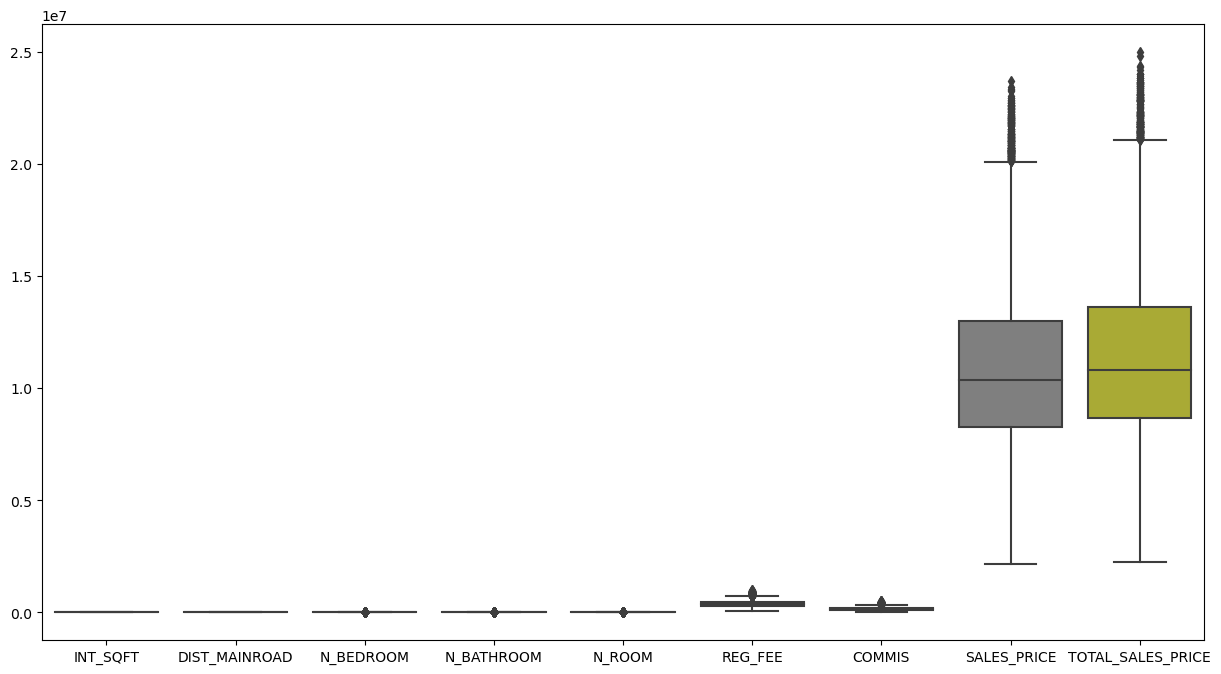

In [66]:
# outliers finding using boxplot

plt.figure(figsize =(15,8))
sns.boxplot(data = df4)
plt.show()

##### It seems there are some outliers present in SALES_PRICE Column

In [67]:
# For understanding property rate we will create one column price/sqft

df4['PRICE_PER_SQ FT'] = df4['TOTAL_SALES_PRICE']/df4['INT_SQFT']

In [68]:
# maximum price per square foot in chennai

df4['PRICE_PER_SQ FT'].max()

19452.509493670885

In [69]:
# minimum price per square ffot in chennai

df4['PRICE_PER_SQ FT'].min()

3138.9220779220777

#### it shows we have rate as per market "if you cross check in google"

In [70]:
## finding outliers in TOTAL _SALES_PRICE COLUMN using IQR Method

q1,q3 = np.percentile(df4['TOTAL_SALES_PRICE'],[25,75])
IQR = q3-q1
lower_val = q1 - (1.5*IQR)
upper_val = q3 + (1.5*IQR)

In [71]:
print('lower value :',lower_val)
print('upper value :',upper_val)

lower value : 1192439.0
upper value : 21067637.0


In [72]:
# Checing no. of outliers present above Upper bound

df4['TOTAL_SALES_PRICE'][df4['TOTAL_SALES_PRICE']>upper_val].count()

227

In [73]:
# Checing no. of outliers present below lower bound

df4['TOTAL_SALES_PRICE'][df4['TOTAL_SALES_PRICE']<lower_val].count()

0

In [74]:
df4.shape

(7108, 19)

In [75]:
# creating new dataframe

df5 = df4.copy()

In [76]:
# using clip method to remove outlier taking 99 % of upper value

df5= df5[df5['TOTAL_SALES_PRICE']==df5['TOTAL_SALES_PRICE'].clip(lower=1192439.0,upper=21067637.0*0.98)]

In [77]:
# shape of data after outlier treatment

df5.shape

(6839, 19)

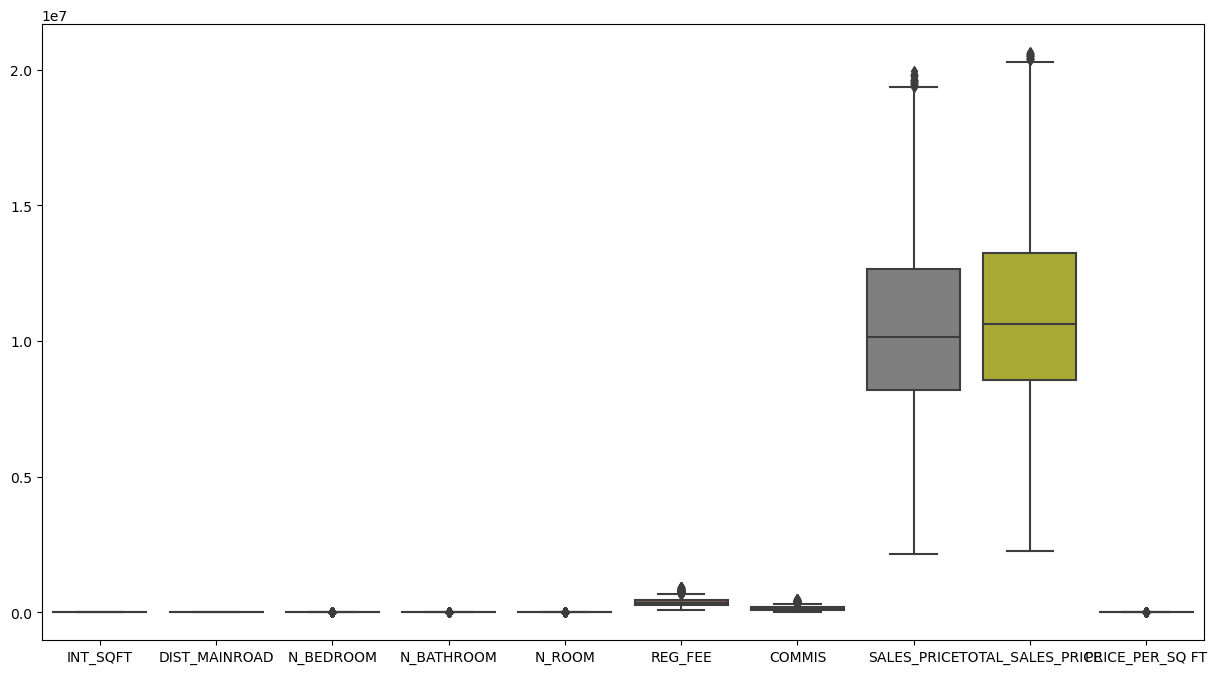

In [78]:
# checking outliers after removing extra rows that are out of upper bound value

fig = plt.figure(figsize =(15,8))
sns.boxplot(data = df5)
plt.show()

In [79]:
# As outliers are present even now, let's take 95% of upper value to clip from data

df5= df5[df5['TOTAL_SALES_PRICE']==df5['TOTAL_SALES_PRICE'].clip(lower=1192439.0,upper=21067637.0*0.95)]

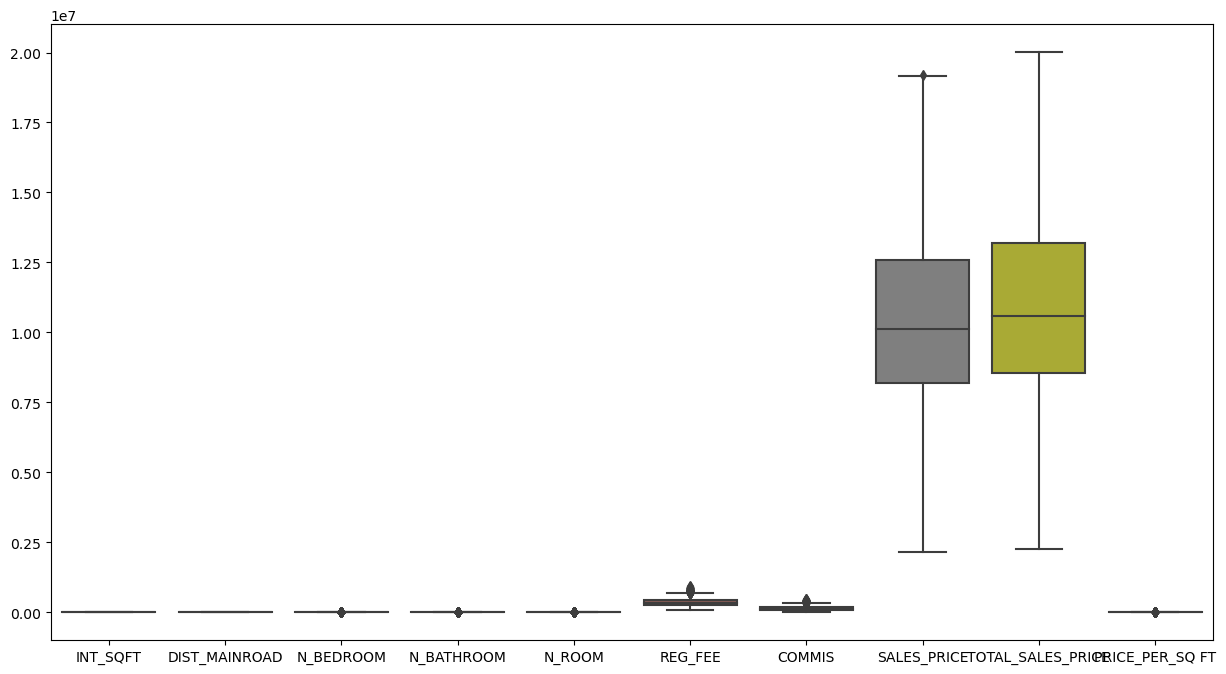

In [80]:
# checking outliers after removing extra rows that are out of upper bound value

fig = plt.figure(figsize =(15,8))
sns.boxplot(data = df5)
plt.show()

##### Outliers removed

In [81]:
# checking dataset again

df5

AREA  INT_SQFT  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  N_ROOM  \
0     Karapakkam      1004            131          1           1       3   
2          Adyar       909             70          1           1       3   
3      Velachery      1855             14          3           2       5   
4     Karapakkam      1226             84          1           1       3   
5       Chrompet      1220             36          2           1       4   
...          ...       ...            ...        ...         ...     ...   
7104  Karapakkam       598             51          1           1       2   
7105   Velachery      1897             52          3           2       5   
7106   Velachery      1614            152          2           1       4   
7107  Karapakkam       787             40          1           1       2   
7108   Velachery      1896            156          3           2       5   

        SALE_COND PARK_FACIL   BUILDTYPE    STREET MZZONE  REG_FEE  COMMIS  \
0        AbNormal        Yes  Commercial     Paved      A   380000  144400   
2        AbNormal        Yes  Commercial    Gravel     RL   421094   92114   
3          Family         No      Others     Paved      I   356321   77042   
4        AbNormal        Yes      Others    Gravel      C   237000   74063   
5         Partial         No  Commercial  NoAccess     RH   409027  198316   
...           ...        ...         ...       ...    ...      ...     ...   
7104      AdjLand         No      Others  NoAccess     RM   208767  107060   
7105       Family        Yes      Others  NoAccess     RH   346191  205551   
7106  Normal Sale         No       House    Gravel      I   317354  167028   
7107      Partial        Yes  Commercial     Paved     RL   425350  119098   
7108      Partial        Yes      Others     Paved      I   349177   79812   

      SALES_PRICE  TOTAL_SALES_PRICE BUILD YEAR SALE_YEAR UTILITY  \
0         7600000            8124400       1967      2011  AllPub   
2        13159200           13672408       1992      2012     ELO   
3         9630290           10063653       1988      2010  NoSewa   
4         7406250            7717313       1979      2009  AllPub   
5        12394750           13002093       2009      2014  NoSewa   
...           ...                ...        ...       ...     ...   
7104      5353000            5668827       1962      2011     ELO   
7105     10818480           11370222       1995      2004  NoSewa   
7106      8351410            8835792       1978      2006  NoSewa   
7107      8507000            9051448       1977      2009     ELO   
7108      9976480           10405469       1961      2005     ELO   

      PRICE_PER_SQ FT  
0         8092.031873  
2        15041.152915  
3         5425.149865  
4         6294.708809  
5        10657.453279  
...               ...  
7104      9479.643813  
7105      5993.791249  
7106      5474.468401  
7107     11501.204574  
7108      5488.116561  

[6782 rows x 19 columns]

In [82]:
# Removing COMMIS and REG_FEE, SALES_PRICE column as these are not required

df5.drop(columns=['REG_FEE', 'COMMIS', 'SALES_PRICE'], inplace= True)

In [83]:
# checking columns

df5.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'STREET', 'MZZONE',
       'TOTAL_SALES_PRICE', 'BUILD YEAR', 'SALE_YEAR', 'UTILITY',
       'PRICE_PER_SQ FT'],
      dtype='object')

In [84]:
df5.head()

AREA  INT_SQFT  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  N_ROOM  \
0  Karapakkam      1004            131          1           1       3   
2       Adyar       909             70          1           1       3   
3   Velachery      1855             14          3           2       5   
4  Karapakkam      1226             84          1           1       3   
5    Chrompet      1220             36          2           1       4   

  SALE_COND PARK_FACIL   BUILDTYPE    STREET MZZONE  TOTAL_SALES_PRICE  \
0  AbNormal        Yes  Commercial     Paved      A            8124400   
2  AbNormal        Yes  Commercial    Gravel     RL           13672408   
3    Family         No      Others     Paved      I           10063653   
4  AbNormal        Yes      Others    Gravel      C            7717313   
5   Partial         No  Commercial  NoAccess     RH           13002093   

  BUILD YEAR SALE_YEAR UTILITY  PRICE_PER_SQ FT  
0       1967      2011  AllPub      8092.031873  
2       1992      2012     ELO     15041.152915  
3       1988      2010  NoSewa      5425.149865  
4       1979      2009  AllPub      6294.708809  
5       2009      2014  NoSewa     10657.453279

#

## Data Visualization

In [85]:
from pandas_profiling import ProfileReport as pf


C:\Users\HP\AppData\Local\Temp\ipykernel_9156\927421620.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport as pf


In [86]:
pf(df5)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [87]:
#Correlation in numerical columns of data (only numerical columns participate)

df5.corr()

C:\Users\HP\AppData\Local\Temp\ipykernel_9156\3116386517.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df5.corr()


INT_SQFT  DIST_MAINROAD  N_BEDROOM  N_BATHROOM    N_ROOM  \
INT_SQFT           1.000000      -0.002273   0.800027    0.543732  0.949781   
DIST_MAINROAD     -0.002273       1.000000  -0.003555    0.003993 -0.001870   
N_BEDROOM          0.800027      -0.003555   1.000000    0.760998  0.851397   
N_BATHROOM         0.543732       0.003993   0.760998    1.000000  0.599007   
N_ROOM             0.949781      -0.001870   0.851397    0.599007  1.000000   
TOTAL_SALES_PRICE  0.611010       0.010762   0.387391    0.195451  0.604707   
PRICE_PER_SQ FT   -0.535176       0.012120  -0.463757   -0.371684 -0.478621   

                   TOTAL_SALES_PRICE  PRICE_PER_SQ FT  
INT_SQFT                    0.611010        -0.535176  
DIST_MAINROAD               0.010762         0.012120  
N_BEDROOM                   0.387391        -0.463757  
N_BATHROOM                  0.195451        -0.371684  
N_ROOM                      0.604707        -0.478621  
TOTAL_SALES_PRICE           1.000000         0.292963  
PRICE_PER_SQ FT             0.292963         1.000000

C:\Users\HP\AppData\Local\Temp\ipykernel_9156\4012904402.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df5.corr(),annot =True)


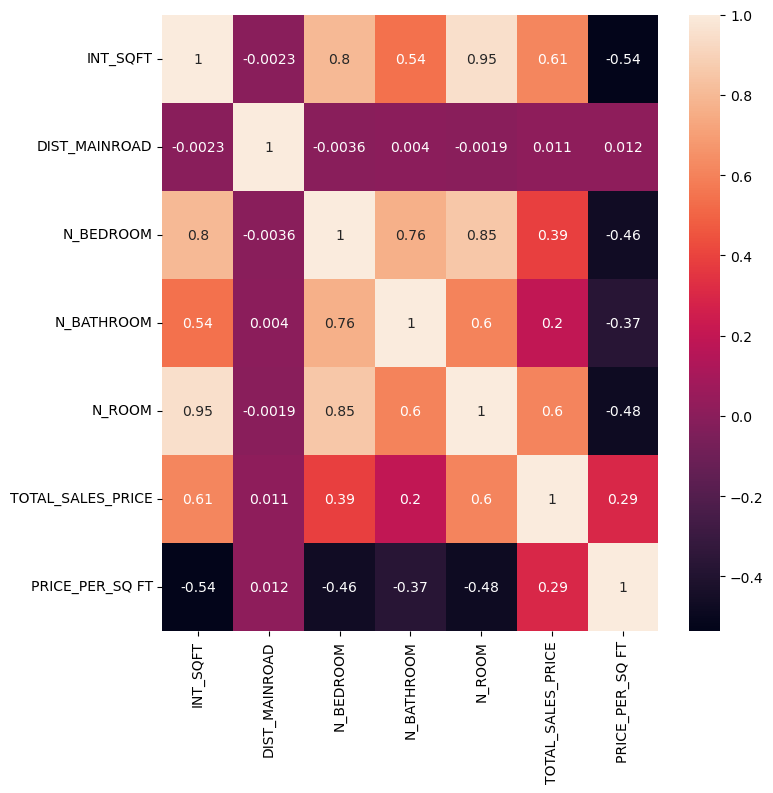

In [88]:
# correlation representation using heatmap

plt.figure(figsize=(8,8))
sns.heatmap(df5.corr(),annot =True)
plt.show()

##### 1. N_Room and INT_SQFT are highly correlated to each other
##### 2. N_Bedroom, N_ROOM and INT_SQFT are correalted to each other
##### 3. N_BATHROOM is Correlated with N_BEDROOM
##### 4. TOTAL_SALES_PRICE is correlated to INT_SQFT,N_ROOM mostly then comes N_BEDROOM and N_BATHROOM
##### 5. Price/SQFT is -ve correlated to N_room, N_Bathroom, N_Bedroom and INT_SQFT


#

####                                                 ------ UNIVARIATE ANALYSIS------

In [89]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6782 entries, 0 to 7108
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AREA               6782 non-null   object 
 1   INT_SQFT           6782 non-null   int64  
 2   DIST_MAINROAD      6782 non-null   int64  
 3   N_BEDROOM          6782 non-null   int32  
 4   N_BATHROOM         6782 non-null   int32  
 5   N_ROOM             6782 non-null   int64  
 6   SALE_COND          6782 non-null   object 
 7   PARK_FACIL         6782 non-null   object 
 8   BUILDTYPE          6782 non-null   object 
 9   STREET             6782 non-null   object 
 10  MZZONE             6782 non-null   object 
 11  TOTAL_SALES_PRICE  6782 non-null   int64  
 12  BUILD YEAR         6782 non-null   object 
 13  SALE_YEAR          6782 non-null   object 
 14  UTILITY            6782 non-null   object 
 15  PRICE_PER_SQ FT    6782 non-null   float64
dtypes: float64(1), int32(2),

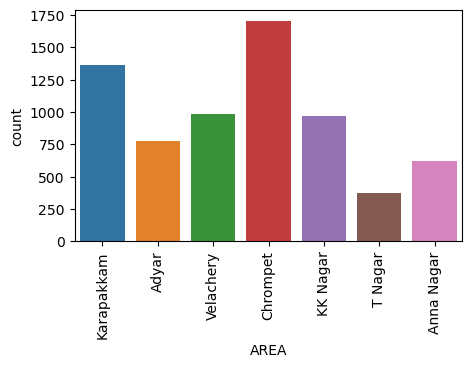

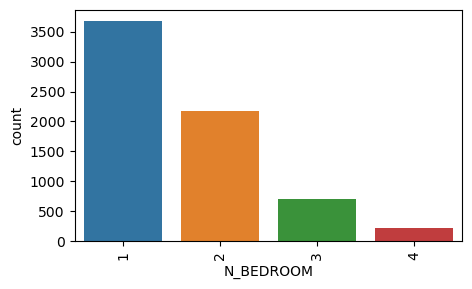

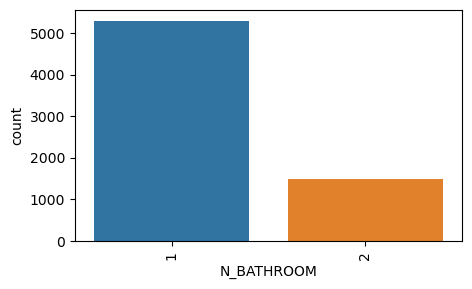

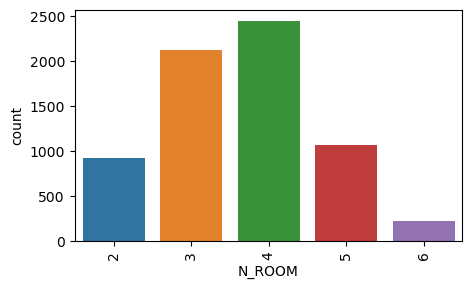

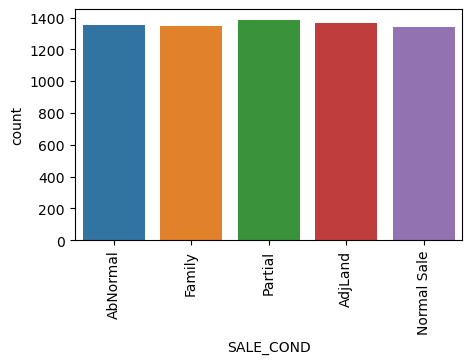

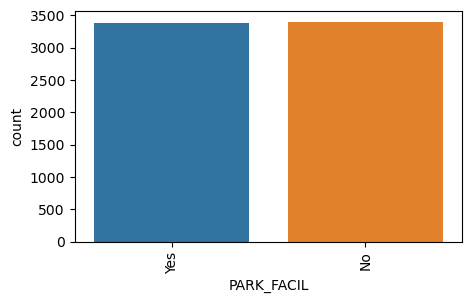

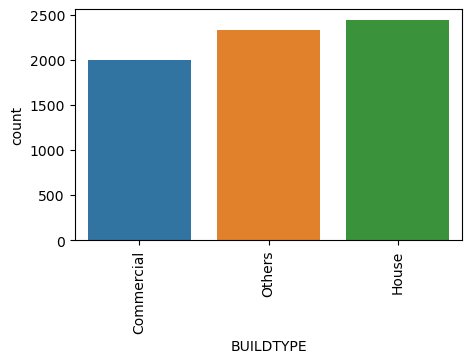

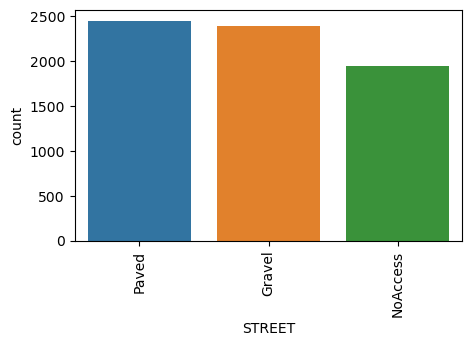

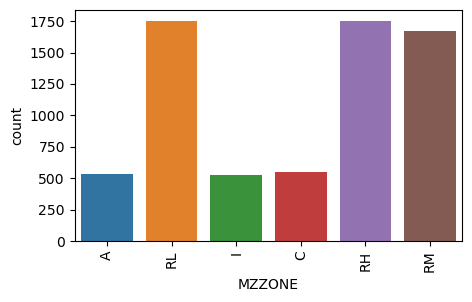

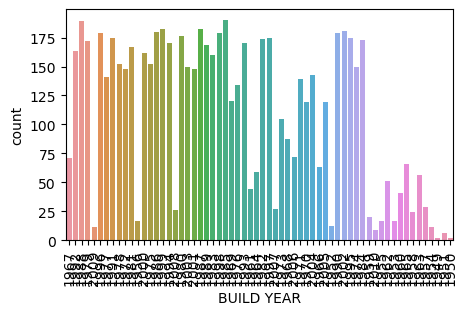

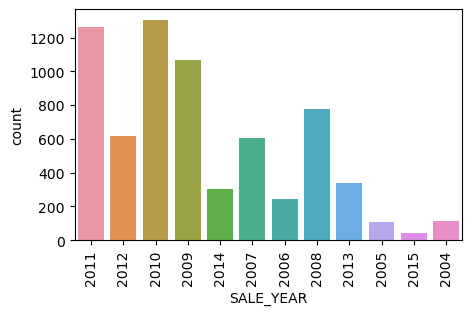

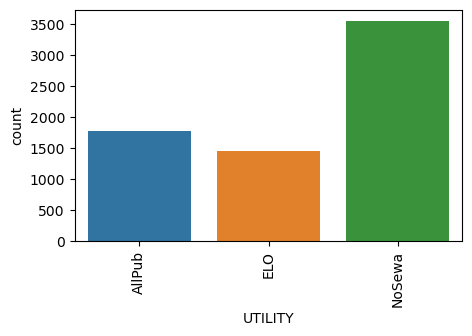

In [90]:
# Countplots of categorical columns

col = ['AREA', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'STREET', 'MZZONE', 'BUILD YEAR', 'SALE_YEAR', 'UTILITY']
for i in col:
    plt.figure(figsize=(5,3))
    sns.countplot(x=df5[i],data = df5)
    plt.xticks(rotation = 90)
    plt.show()
        

##### 1. AREA- Chrompet AREA has max houses and T Nagar has min houses
##### 2. N_BEDROOM - There are max houses with 1 bedroom (3500+) and 4 bedroom houses(250 approx) -minimum
##### 3. N_BATHROOM- 5000+ Houses has only 1 bathroom and 1500 approx houses has 2 bathrooms
##### 4. No. of rooms - 2500+ houses has 4 rooms(max) and 200 houses has 6 rooms(min)
##### 5. SALE Condition - condition-wise houses are equally divides- approx 1300 each
##### 6. Park Facility - 3200 houses has parking and similar number for 'no parking'
##### 7. BUILDTYPE- Max houses(2400) were built commercial are less
##### 8. STREET - Paved streets max (2300 apprx)
##### 9. MZZONE - RH ZONE has max houses(1700), I Zone has min houses(500)
##### 10.SALE_ YEAR -In 2010 year max houses(1300 apprx) were sold, in 2015 min houses were sold(75 apprx)
####  11. UTILITY- NOSewa category houses are max(3500) , with ELO min houses(1300)

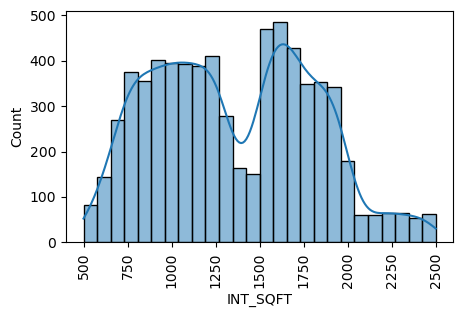

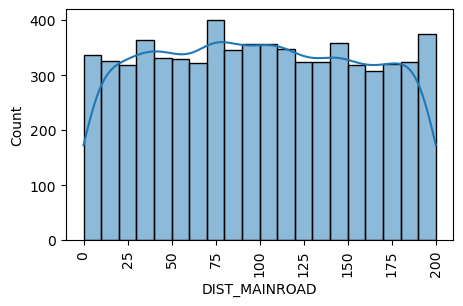

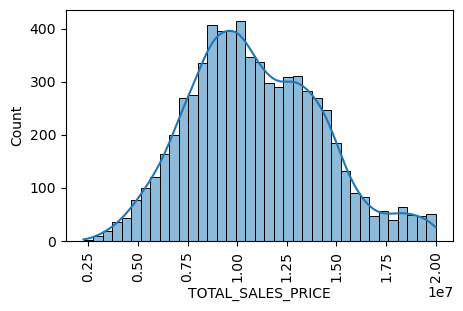

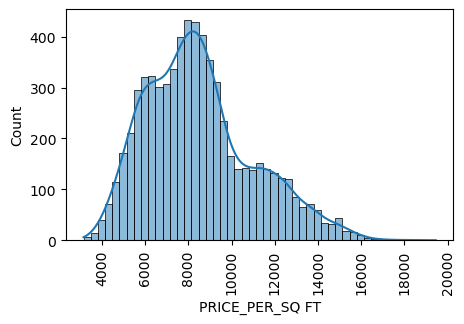

In [91]:
# Distribution - histogram plot

col = [ 'INT_SQFT', 'DIST_MAINROAD', 
       'TOTAL_SALES_PRICE',
       'PRICE_PER_SQ FT']
for i in col:
    plt.figure(figsize=(5,3))
    sns.histplot(x=df5[i],data = df5,kde= True)
    plt.xticks(rotation = 90)
    plt.show()
        

##### 1.Total Sales price is approximate normally distributed
##### 2.Price Per Square foot is somwhat right skewed



#


####                                          ---- BIVARIATE ANALYSIS----

In [92]:
df5.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'STREET', 'MZZONE',
       'TOTAL_SALES_PRICE', 'BUILD YEAR', 'SALE_YEAR', 'UTILITY',
       'PRICE_PER_SQ FT'],
      dtype='object')

Text(0.5, 1.0, 'scatterplot')

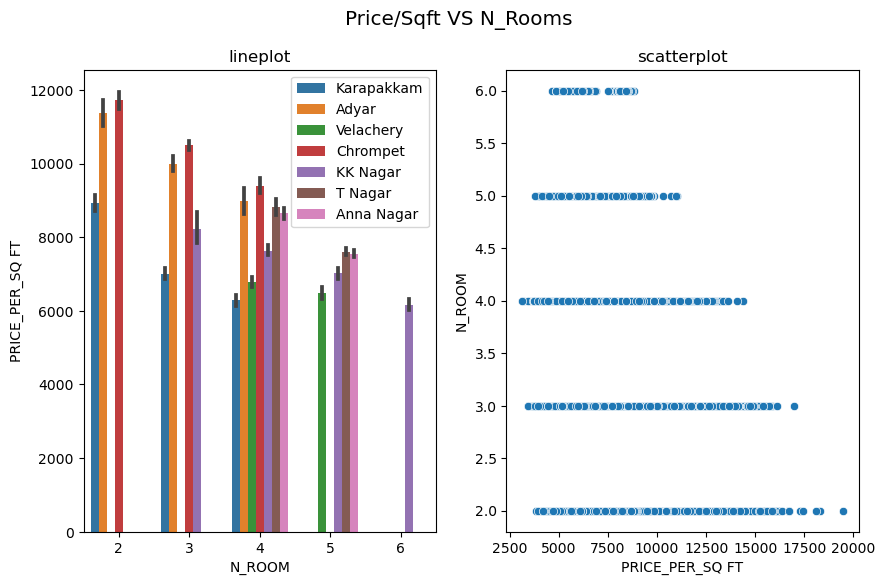

In [93]:
# drawing barplot and scatterplot for 'PRICE/SQFT' and 'Number of Rooms'

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,6))
sns.barplot(x="N_ROOM",y="PRICE_PER_SQ FT", data  = df5, ax =ax[0], hue='AREA')
sns.scatterplot(x="PRICE_PER_SQ FT", y="N_ROOM", data  = df5, ax = ax[1])
plt.suptitle('Price/Sqft VS N_Rooms',fontsize="x-large")
ax[0].legend(loc='upper right')
ax[0].set_title('lineplot')
ax[1].set_title('scatterplot')

##### 1. Price per sq foot is higher for 2 room houses
##### 2. Price per sq foot is lesser for 6 room houses
##### 3. KK Nagar Area has 6 room houses
##### 4. Chrompet Area has 2,3 and 4 room houses and expensive of all Area - considering Price Per square foot cost


Text(0.5, 1.0, 'scatterplot')

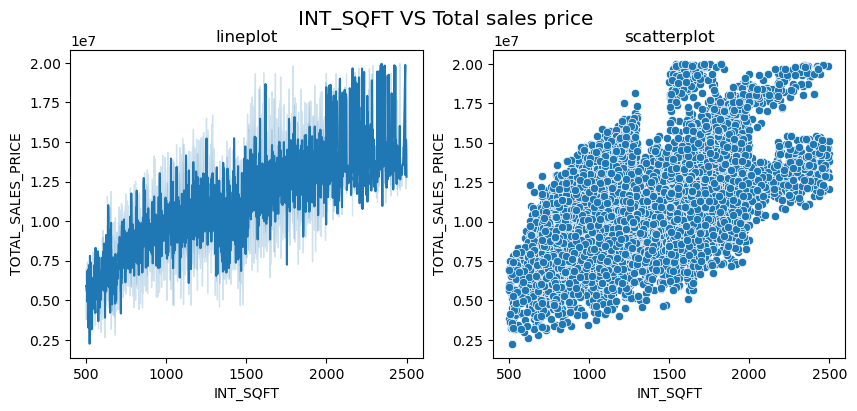

In [94]:
# drawing lineplot and scatterplot for 'INT_SQFT' and 'TOTAL_SALES_PRICE'

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
sns.lineplot(x="INT_SQFT", y="TOTAL_SALES_PRICE", data  = df5, ax =ax[0])
sns.scatterplot(x="INT_SQFT", y="TOTAL_SALES_PRICE", data  = df5, ax = ax[1])
plt.suptitle('INT_SQFT VS Total sales price',fontsize="x-large")
ax[0].set_title('lineplot')
ax[1].set_title('scatterplot')

##### As Int Sqft increasing Total_Sale price also increasing

Text(0.5, 1.0, 'scatterplot')

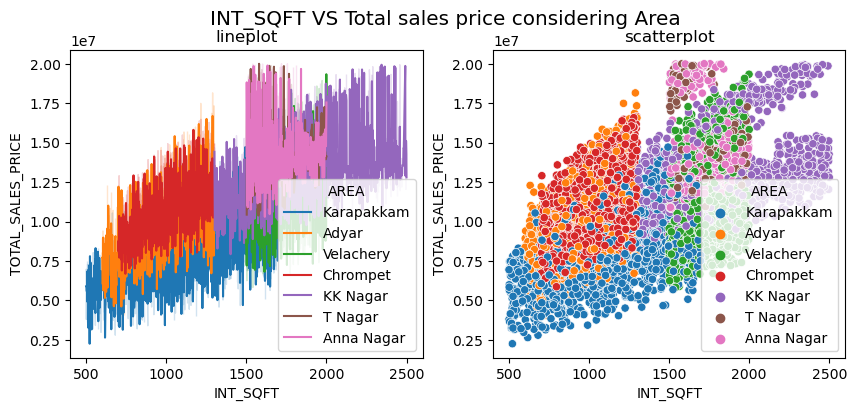

In [95]:
# drawing lineplot and scatterplot for 'INT_SQFT' and 'TOTAL_SALES_PRICE' in reference to AREA

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
sns.lineplot(x="INT_SQFT", y="TOTAL_SALES_PRICE", data  = df5, ax =ax[0], hue='AREA')
sns.scatterplot(x="INT_SQFT", y="TOTAL_SALES_PRICE", data  = df5, ax = ax[1], hue='AREA')
plt.suptitle('INT_SQFT VS Total sales price considering Area',fontsize="x-large")
ax[0].set_title('lineplot')
ax[1].set_title('scatterplot')

Text(0.5, 1.0, 'scatterplot')

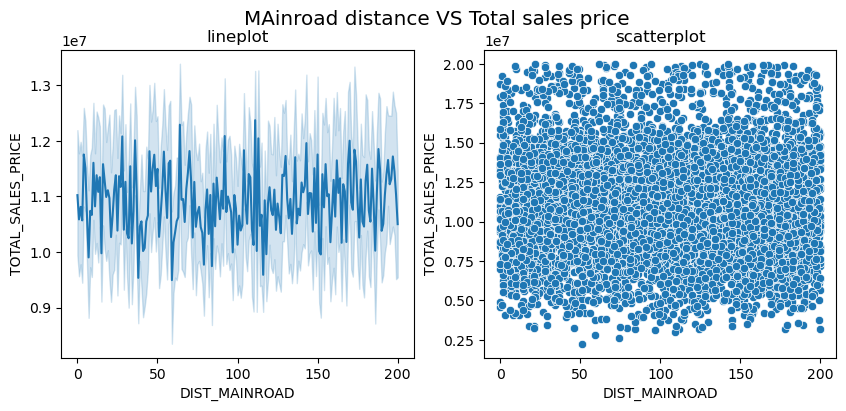

In [96]:
# drawing lineplot and scatterplot for 'DIST_MAINROAD' and 'TOTAL_SALES_PRICE'

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
sns.lineplot(x="DIST_MAINROAD", y="TOTAL_SALES_PRICE", data  = df5, ax =ax[0])
sns.scatterplot(x="DIST_MAINROAD", y="TOTAL_SALES_PRICE", data  = df5, ax = ax[1])
plt.suptitle('MAinroad distance VS Total sales price',fontsize="x-large")
ax[0].set_title('lineplot')
ax[1].set_title('scatterplot')

##### It shows distance from mainroad does not affect sales price of property

Text(0.5, 1.0, 'lineplot- Bedrooms vs Total Sales Price')

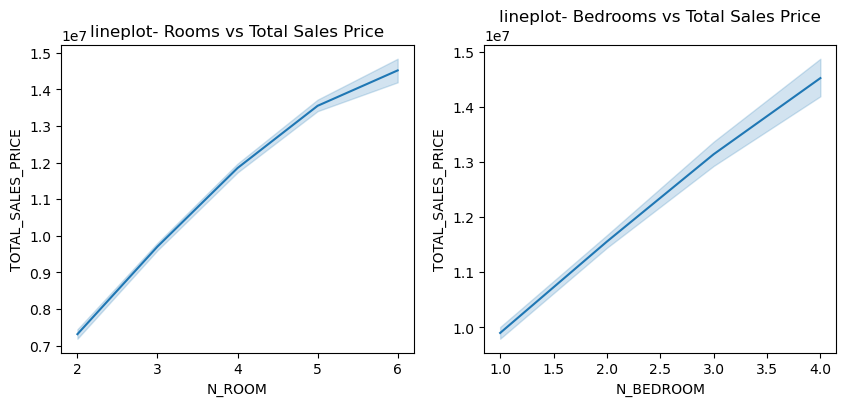

In [97]:
# Number of rooms and bedrooms affect on Total sales price

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
sns.lineplot(x="N_ROOM", y="TOTAL_SALES_PRICE", data  = df5, ax=ax[0])

sns.lineplot(x="N_BEDROOM", y="TOTAL_SALES_PRICE", data = df5, ax=ax[1])


ax[0].set_title('lineplot- Rooms vs Total Sales Price')
ax[1].set_title('lineplot- Bedrooms vs Total Sales Price')


Text(0.5, 1.0, 'lineplot- SQFT vs Total Sales Price')

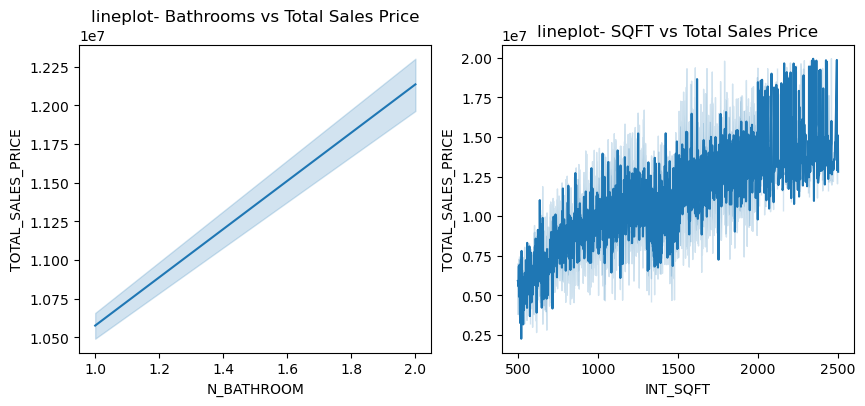

In [98]:
# Number of Bathrooms and INT_SQFT affect on Total sales price

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
sns.lineplot(x="N_BATHROOM", y="TOTAL_SALES_PRICE", data  = df5,ax =ax[0])
sns.lineplot(x="INT_SQFT", y="TOTAL_SALES_PRICE", data  = df5, ax =ax[1])


ax[0].set_title('lineplot- Bathrooms vs Total Sales Price')
ax[1].set_title('lineplot- SQFT vs Total Sales Price')


Text(0.5, 1.0, 'AREA VS TOTAL_SALES_PRICE considering ROOMS')

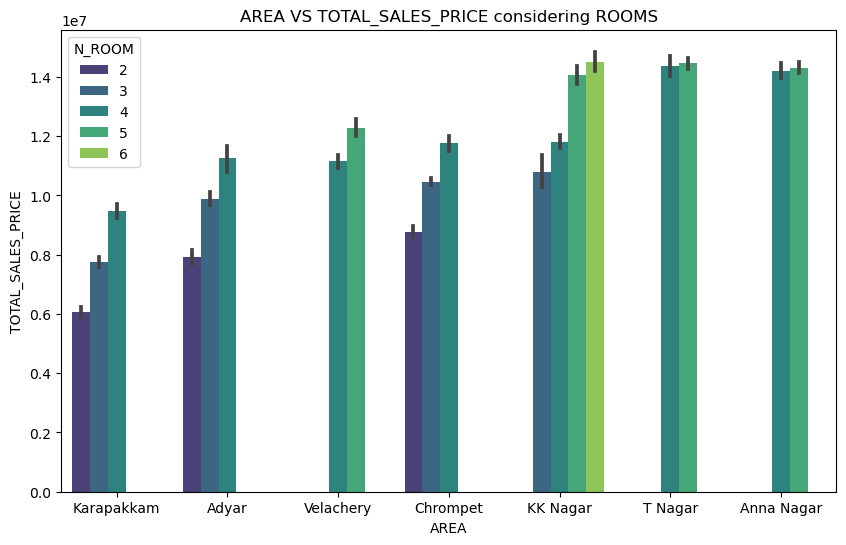

In [99]:
# AREA VS SALES_PRICE considering rooms

fig = plt.figure(figsize =(10,6))
sns.barplot(x='AREA',y= 'TOTAL_SALES_PRICE', data = df5 ,hue ='N_ROOM',color ='b', palette = "viridis")
plt.title('AREA VS TOTAL_SALES_PRICE considering ROOMS')


##### 1. 6 Room house is available only in KK NAGAR
##### 2. karapakkam is society having low Sales price in Chennai which has 2,3,4 Rooms houses available
##### 3. T NAGAR AND ANNA NAGAR has high sales price among all locations 



Text(0.5, 1.0, 'AREA VS SALES_PRICE considering Bedrooms')

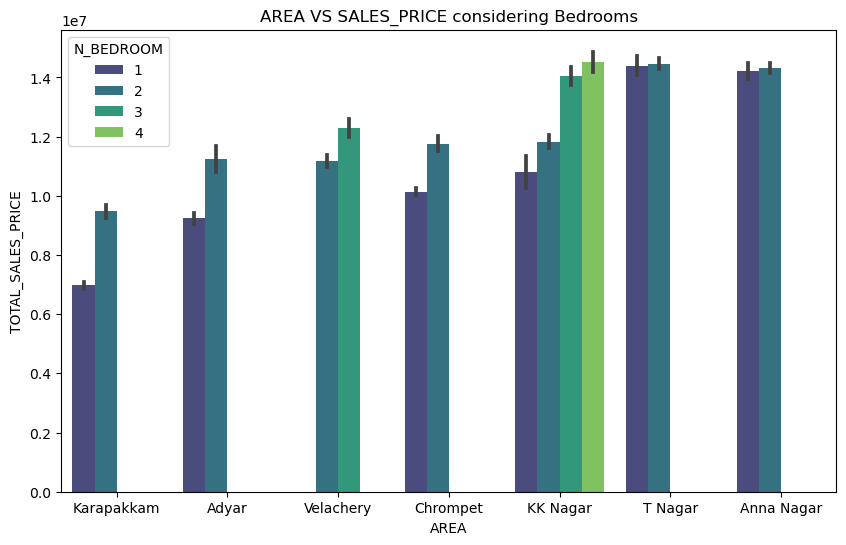

In [100]:
# AREA VS SALES_PRICE considering Bedrooms

fig = plt.figure(figsize =(10,6))
sns.barplot(x='AREA',y= 'TOTAL_SALES_PRICE', data = df5 ,hue ='N_BEDROOM',color ='b', palette = "viridis")
plt.title('AREA VS SALES_PRICE considering Bedrooms')

##### KKAGAR Society is versatile which has 1-4 Bedrooms Houses available


Text(0.5, 1.0, 'SQUARE FOOT VS LOCATION')

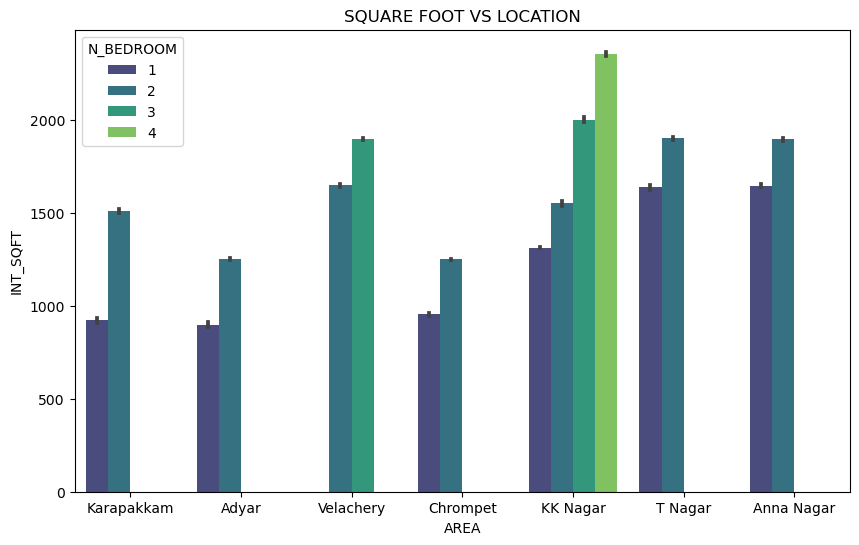

In [101]:
# SQUARE FOOT VS LOCATION

fig = plt.figure(figsize =(10,6))
sns.barplot(x='AREA',y= 'INT_SQFT', data = df5 ,hue ='N_BEDROOM',color ='b', palette = "viridis")
plt.title('SQUARE FOOT VS LOCATION')

##### 1. KK NAGAR Area has 1200-2500 SQ FT Range houses available
##### 2. Chrompet and Adyar area has 900-1200 SQ ft range area (minimum among all AREA)

Text(0.5, 1.0, 'AREA VS PRICE/SQFT')

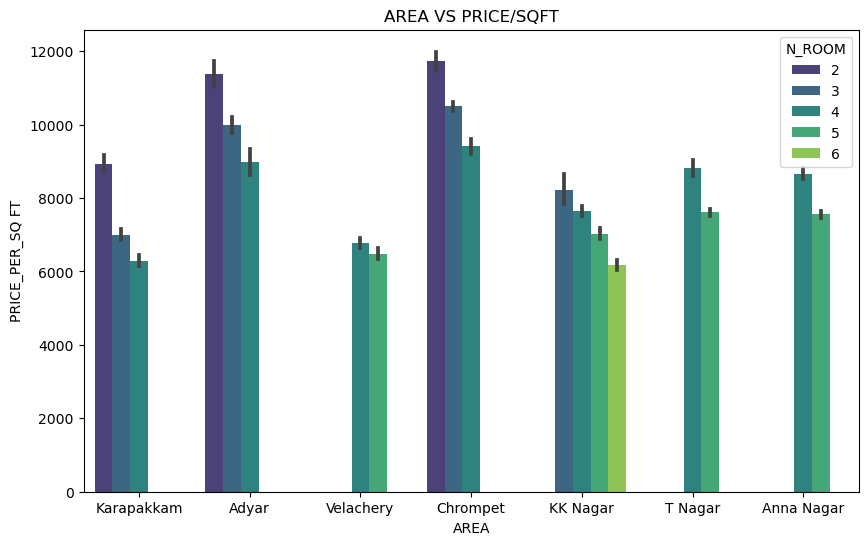

In [102]:
# AREA VS PRICE/SQFT

fig = plt.figure(figsize =(10,6))
sns.barplot(x='AREA',y= 'PRICE_PER_SQ FT', data = df5 ,hue = 'N_ROOM',color ='b', palette = "viridis")
plt.title('AREA VS PRICE/SQFT')

#### Chrompet and Adyar area is expensive one even 2-4 Rooms available only 
      but Price/SQFT is reaching around 11000/SQFT

In [103]:
df5.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'STREET', 'MZZONE',
       'TOTAL_SALES_PRICE', 'BUILD YEAR', 'SALE_YEAR', 'UTILITY',
       'PRICE_PER_SQ FT'],
      dtype='object')

Text(0.5, 1.0, 'BUILD TYPE VS PRICE/SQFT')

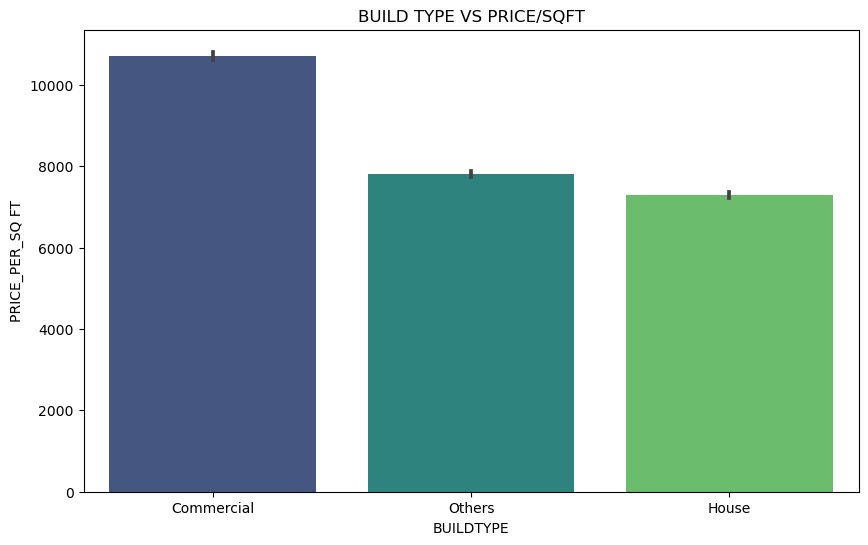

In [104]:
# BUILD TYPE VS PRICE/SQFT

fig = plt.figure(figsize =(10,6))
sns.barplot(x='BUILDTYPE',y= 'PRICE_PER_SQ FT', data = df5 ,color ='b', palette = "viridis")
plt.title('BUILD TYPE VS PRICE/SQFT')

##### Commercial houses are expensive and simple Houses are cheaper

Text(0.5, 1.0, 'MZZONE vs total sales price')

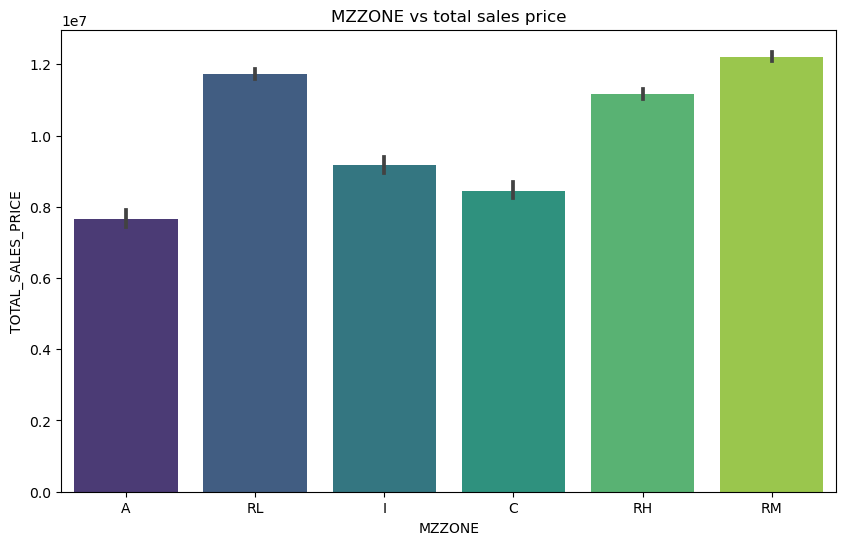

In [105]:
# MZZONE vs total sales price

fig = plt.figure(figsize =(10,6))
sns.barplot(x='MZZONE',y= 'TOTAL_SALES_PRICE', data = df5 , color ='b', palette = "viridis")
plt.title('MZZONE vs total sales price')

Text(0.5, 1.0, 'MZZONE vs Price/SQFT')

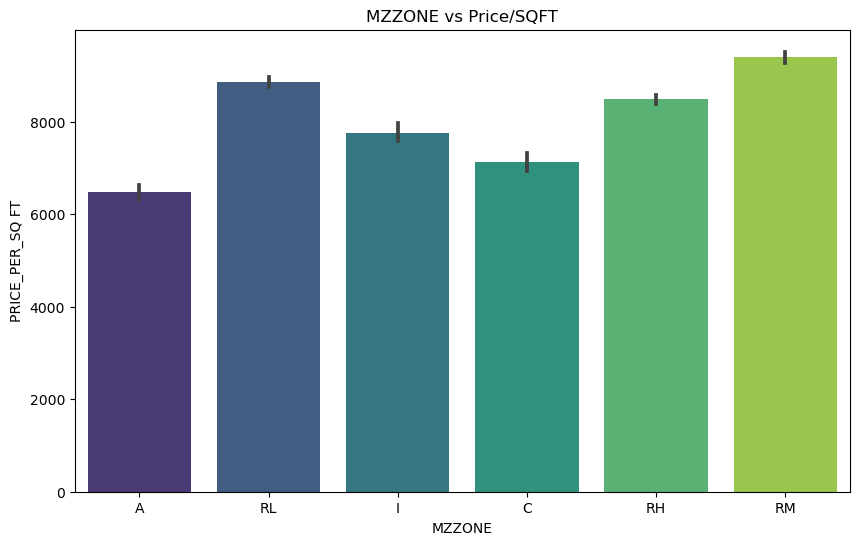

In [106]:
# MZZONE vs Price/SQFT

fig = plt.figure(figsize =(10,6))
sns.barplot(x='MZZONE',y= 'PRICE_PER_SQ FT', data = df5 , color ='b', palette = "viridis")
plt.title('MZZONE vs Price/SQFT')

##### MZZONE tells about the status of society - A is the cheaper,RL, RH and RM comes under expensive 

Text(0.5, 1.0, 'Street vs total sales price')

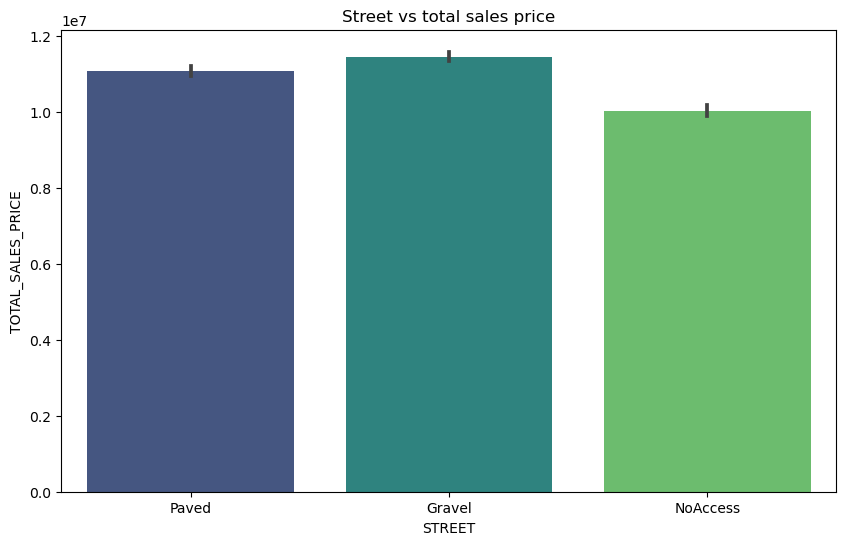

In [107]:
# Street vs total sales price

fig = plt.figure(figsize =(10,6))
sns.barplot(x='STREET',y= 'TOTAL_SALES_PRICE', data = df5 , color ='b', palette = "viridis")
plt.title('Street vs total sales price')

Text(0.5, 1.0, 'NO. of Houses vs Price/SQFT')

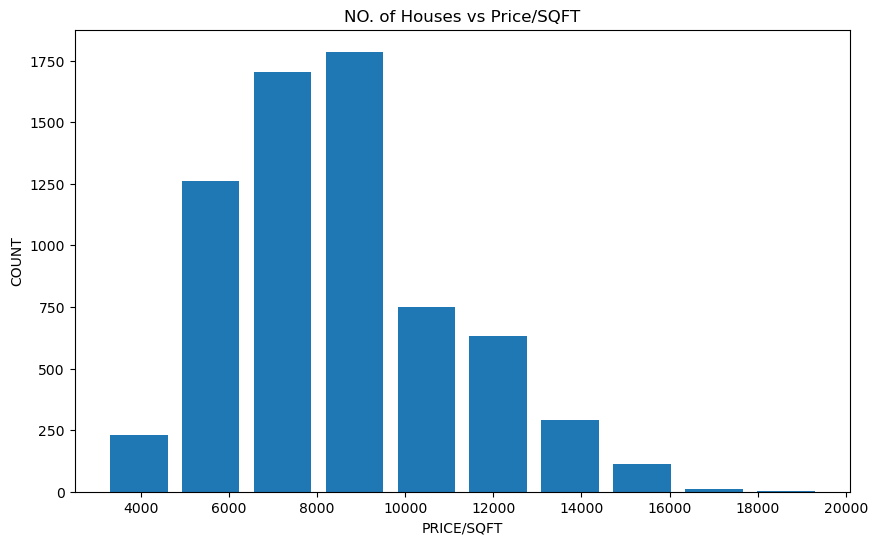

In [108]:
# NO. of Houses vs Price/SQFT

fig = plt.figure(figsize =(10,6))
plt.hist('PRICE_PER_SQ FT', data = df5, rwidth = 0.8)
plt.xlabel('PRICE/SQFT')
plt.ylabel('COUNT')
plt.title('NO. of Houses vs Price/SQFT')


##### 1. Around 4700 houses cost is in range of 5000-9000 Rs/ SQFT
##### 2. 100-150 houses cost is in range of 14000+ RS/SQFT


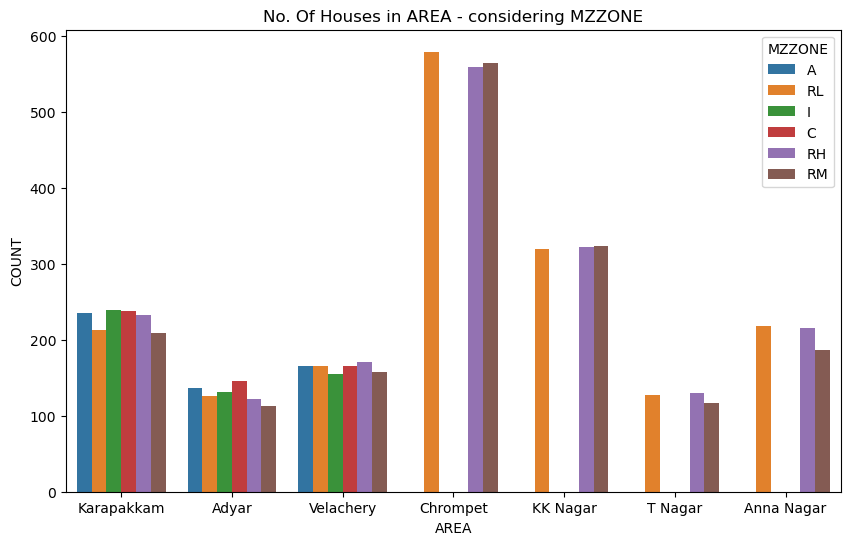

In [109]:
# No. Of Houses in AREA - considering MZZONE

plt.figure(figsize =(10,6))
sns.countplot(x='AREA', data = df5, hue = 'MZZONE')
plt.xlabel('AREA')
plt.ylabel('COUNT')
plt.title('No. Of Houses in AREA - considering MZZONE')
plt.show()

In [110]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6782 entries, 0 to 7108
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AREA               6782 non-null   object 
 1   INT_SQFT           6782 non-null   int64  
 2   DIST_MAINROAD      6782 non-null   int64  
 3   N_BEDROOM          6782 non-null   int32  
 4   N_BATHROOM         6782 non-null   int32  
 5   N_ROOM             6782 non-null   int64  
 6   SALE_COND          6782 non-null   object 
 7   PARK_FACIL         6782 non-null   object 
 8   BUILDTYPE          6782 non-null   object 
 9   STREET             6782 non-null   object 
 10  MZZONE             6782 non-null   object 
 11  TOTAL_SALES_PRICE  6782 non-null   int64  
 12  BUILD YEAR         6782 non-null   object 
 13  SALE_YEAR          6782 non-null   object 
 14  UTILITY            6782 non-null   object 
 15  PRICE_PER_SQ FT    6782 non-null   float64
dtypes: float64(1), int32(2),

In [111]:
# Converting numeric values in to int data type

In [112]:
df5[['BUILD YEAR', 'SALE_YEAR']] = df5[['BUILD YEAR', 'SALE_YEAR']].apply(pd.to_numeric)

In [113]:
df5[['N_BATHROOM', 'N_BEDROOM']] = df5[['N_BATHROOM', 'N_BEDROOM']].astype(int)

In [114]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6782 entries, 0 to 7108
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AREA               6782 non-null   object 
 1   INT_SQFT           6782 non-null   int64  
 2   DIST_MAINROAD      6782 non-null   int64  
 3   N_BEDROOM          6782 non-null   int32  
 4   N_BATHROOM         6782 non-null   int32  
 5   N_ROOM             6782 non-null   int64  
 6   SALE_COND          6782 non-null   object 
 7   PARK_FACIL         6782 non-null   object 
 8   BUILDTYPE          6782 non-null   object 
 9   STREET             6782 non-null   object 
 10  MZZONE             6782 non-null   object 
 11  TOTAL_SALES_PRICE  6782 non-null   int64  
 12  BUILD YEAR         6782 non-null   int64  
 13  SALE_YEAR          6782 non-null   int64  
 14  UTILITY            6782 non-null   object 
 15  PRICE_PER_SQ FT    6782 non-null   float64
dtypes: float64(1), int32(2),

In [115]:
df5['PROP_AGE'] = df5['SALE_YEAR']-df5['BUILD YEAR']

In [116]:
df5['PROP_AGE']

0       44
2       20
3       22
4       30
5        5
        ..
7104    49
7105     9
7106    28
7107    32
7108    44
Name: PROP_AGE, Length: 6782, dtype: int64

Text(0.5, 1.0, 'PROP_AGE vs PRICE/SQFT as per location')

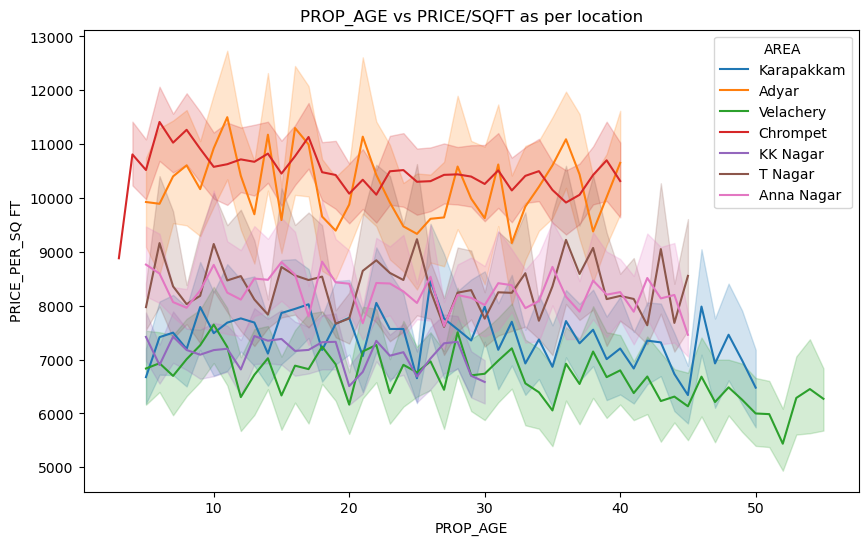

In [117]:
# Property age vs Price/sqft as per location

fig = plt.figure(figsize =(10,6))
sns.lineplot(x='PROP_AGE',y='PRICE_PER_SQ FT', data = df5, hue = 'AREA')
plt.title('PROP_AGE vs PRICE/SQFT as per location')

Text(0.5, 1.0, 'PROP_AGE vs SALES/PRICE')

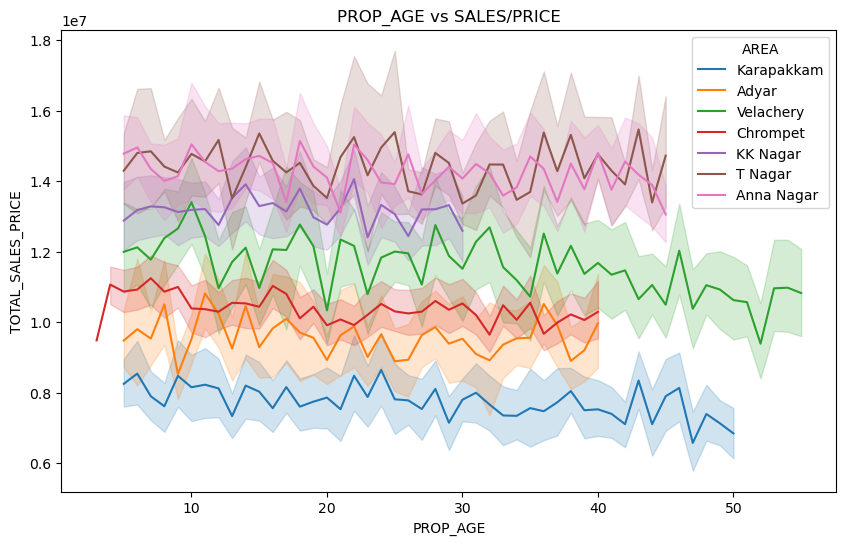

In [118]:
fig = plt.figure(figsize =(10,6))
sns.lineplot(x='PROP_AGE',y='TOTAL_SALES_PRICE', data =df5, hue = 'AREA')
plt.title('PROP_AGE vs SALES/PRICE')

In [119]:
# preparing data for model creation now

df6 = df5.copy()

In [120]:
df6.head()

AREA  INT_SQFT  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  N_ROOM  \
0  Karapakkam      1004            131          1           1       3   
2       Adyar       909             70          1           1       3   
3   Velachery      1855             14          3           2       5   
4  Karapakkam      1226             84          1           1       3   
5    Chrompet      1220             36          2           1       4   

  SALE_COND PARK_FACIL   BUILDTYPE    STREET MZZONE  TOTAL_SALES_PRICE  \
0  AbNormal        Yes  Commercial     Paved      A            8124400   
2  AbNormal        Yes  Commercial    Gravel     RL           13672408   
3    Family         No      Others     Paved      I           10063653   
4  AbNormal        Yes      Others    Gravel      C            7717313   
5   Partial         No  Commercial  NoAccess     RH           13002093   

   BUILD YEAR  SALE_YEAR UTILITY  PRICE_PER_SQ FT  PROP_AGE  
0        1967       2011  AllPub      8092.031873        44  
2        1992       2012     ELO     15041.152915        20  
3        1988       2010  NoSewa      5425.149865        22  
4        1979       2009  AllPub      6294.708809        30  
5        2009       2014  NoSewa     10657.453279         5

In [121]:
# Dropping irreleveant columns
df6.drop(['DIST_MAINROAD','MZZONE','BUILD YEAR','SALE_YEAR'],axis =1, inplace =True)

In [122]:
# Checking shape of column
df6.shape

(6782, 13)

In [123]:
# checking dataframe after removing columns
df6.head()

AREA  INT_SQFT  N_BEDROOM  N_BATHROOM  N_ROOM SALE_COND PARK_FACIL  \
0  Karapakkam      1004          1           1       3  AbNormal        Yes   
2       Adyar       909          1           1       3  AbNormal        Yes   
3   Velachery      1855          3           2       5    Family         No   
4  Karapakkam      1226          1           1       3  AbNormal        Yes   
5    Chrompet      1220          2           1       4   Partial         No   

    BUILDTYPE    STREET  TOTAL_SALES_PRICE UTILITY  PRICE_PER_SQ FT  PROP_AGE  
0  Commercial     Paved            8124400  AllPub      8092.031873        44  
2  Commercial    Gravel           13672408     ELO     15041.152915        20  
3      Others     Paved           10063653  NoSewa      5425.149865        22  
4      Others    Gravel            7717313  AllPub      6294.708809        30  
5  Commercial  NoAccess           13002093  NoSewa     10657.453279         5

#### Convert categorical columns in numerical data
-    Methods
- 1. replace method
- 2. Label Encoding(Binary caegories) 
- 3. ONE HOT ENCODING(pd.get_dummies)
- 4. Count /Frequency Encoding
m

In [124]:
# creating dataframe copy in to df7

df7 = df6.copy()

In [125]:
df7.head()

AREA  INT_SQFT  N_BEDROOM  N_BATHROOM  N_ROOM SALE_COND PARK_FACIL  \
0  Karapakkam      1004          1           1       3  AbNormal        Yes   
2       Adyar       909          1           1       3  AbNormal        Yes   
3   Velachery      1855          3           2       5    Family         No   
4  Karapakkam      1226          1           1       3  AbNormal        Yes   
5    Chrompet      1220          2           1       4   Partial         No   

    BUILDTYPE    STREET  TOTAL_SALES_PRICE UTILITY  PRICE_PER_SQ FT  PROP_AGE  
0  Commercial     Paved            8124400  AllPub      8092.031873        44  
2  Commercial    Gravel           13672408     ELO     15041.152915        20  
3      Others     Paved           10063653  NoSewa      5425.149865        22  
4      Others    Gravel            7717313  AllPub      6294.708809        30  
5  Commercial  NoAccess           13002093  NoSewa     10657.453279         5

In [126]:
dummies = pd.get_dummies(data= df7[['PARK_FACIL','AREA','SALE_COND','BUILDTYPE','STREET','UTILITY']], drop_first =True)

In [127]:
dummies

PARK_FACIL_Yes  AREA_Anna Nagar  AREA_Chrompet  AREA_KK Nagar  \
0                  1                0              0              0   
2                  1                0              0              0   
3                  0                0              0              0   
4                  1                0              0              0   
5                  0                0              1              0   
...              ...              ...            ...            ...   
7104               0                0              0              0   
7105               1                0              0              0   
7106               0                0              0              0   
7107               1                0              0              0   
7108               1                0              0              0   

      AREA_Karapakkam  AREA_T Nagar  AREA_Velachery  SALE_COND_AdjLand  \
0                   1             0               0                  0   
2                   0             0               0                  0   
3                   0             0               1                  0   
4                   1             0               0                  0   
5                   0             0               0                  0   
...               ...           ...             ...                ...   
7104                1             0               0                  1   
7105                0             0               1                  0   
7106                0             0               1                  0   
7107                1             0               0                  0   
7108                0             0               1                  0   

      SALE_COND_Family  SALE_COND_Normal Sale  SALE_COND_Partial  \
0                    0                      0                  0   
2                    0                      0                  0   
3                    1                      0                  0   
4                    0                      0                  0   
5                    0                      0                  1   
...                ...                    ...                ...   
7104                 0                      0                  0   
7105                 1                      0                  0   
7106                 0                      1                  0   
7107                 0                      0                  1   
7108                 0                      0                  1   

      BUILDTYPE_House  BUILDTYPE_Others  STREET_NoAccess  STREET_Paved  \
0                   0                 0                0             1   
2                   0                 0                0             0   
3                   0                 1                0             1   
4                   0                 1                0             0   
5                   0                 0                1             0   
...               ...               ...              ...           ...   
7104                0                 1                1             0   
7105                0                 1                1             0   
7106                1                 0                0             0   
7107                0                 0                0             1   
7108                0                 1                0             1   

      UTILITY_ELO  UTILITY_NoSewa  
0               0               0  
2               1               0  
3               0               1  
4               0               0  
5               0               1  
...           ...             ...  
7104            1               0  
7105            0               1  
7106            0               1  
7107            1               0  
7108            1               0  

[6782 rows x 17 columns]

In [128]:
dummies.columns

Index(['PARK_FACIL_Yes', 'AREA_Anna Nagar', 'AREA_Chrompet', 'AREA_KK Nagar',
       'AREA_Karapakkam', 'AREA_T Nagar', 'AREA_Velachery',
       'SALE_COND_AdjLand', 'SALE_COND_Family', 'SALE_COND_Normal Sale',
       'SALE_COND_Partial', 'BUILDTYPE_House', 'BUILDTYPE_Others',
       'STREET_NoAccess', 'STREET_Paved', 'UTILITY_ELO', 'UTILITY_NoSewa'],
      dtype='object')

In [129]:
dummies.shape

(6782, 17)

In [130]:
dummies.columns

Index(['PARK_FACIL_Yes', 'AREA_Anna Nagar', 'AREA_Chrompet', 'AREA_KK Nagar',
       'AREA_Karapakkam', 'AREA_T Nagar', 'AREA_Velachery',
       'SALE_COND_AdjLand', 'SALE_COND_Family', 'SALE_COND_Normal Sale',
       'SALE_COND_Partial', 'BUILDTYPE_House', 'BUILDTYPE_Others',
       'STREET_NoAccess', 'STREET_Paved', 'UTILITY_ELO', 'UTILITY_NoSewa'],
      dtype='object')

In [131]:
dummies

PARK_FACIL_Yes  AREA_Anna Nagar  AREA_Chrompet  AREA_KK Nagar  \
0                  1                0              0              0   
2                  1                0              0              0   
3                  0                0              0              0   
4                  1                0              0              0   
5                  0                0              1              0   
...              ...              ...            ...            ...   
7104               0                0              0              0   
7105               1                0              0              0   
7106               0                0              0              0   
7107               1                0              0              0   
7108               1                0              0              0   

      AREA_Karapakkam  AREA_T Nagar  AREA_Velachery  SALE_COND_AdjLand  \
0                   1             0               0                  0   
2                   0             0               0                  0   
3                   0             0               1                  0   
4                   1             0               0                  0   
5                   0             0               0                  0   
...               ...           ...             ...                ...   
7104                1             0               0                  1   
7105                0             0               1                  0   
7106                0             0               1                  0   
7107                1             0               0                  0   
7108                0             0               1                  0   

      SALE_COND_Family  SALE_COND_Normal Sale  SALE_COND_Partial  \
0                    0                      0                  0   
2                    0                      0                  0   
3                    1                      0                  0   
4                    0                      0                  0   
5                    0                      0                  1   
...                ...                    ...                ...   
7104                 0                      0                  0   
7105                 1                      0                  0   
7106                 0                      1                  0   
7107                 0                      0                  1   
7108                 0                      0                  1   

      BUILDTYPE_House  BUILDTYPE_Others  STREET_NoAccess  STREET_Paved  \
0                   0                 0                0             1   
2                   0                 0                0             0   
3                   0                 1                0             1   
4                   0                 1                0             0   
5                   0                 0                1             0   
...               ...               ...              ...           ...   
7104                0                 1                1             0   
7105                0                 1                1             0   
7106                1                 0                0             0   
7107                0                 0                0             1   
7108                0                 1                0             1   

      UTILITY_ELO  UTILITY_NoSewa  
0               0               0  
2               1               0  
3               0               1  
4               0               0  
5               0               1  
...           ...             ...  
7104            1               0  
7105            0               1  
7106            0               1  
7107            1               0  
7108            1               0  

[6782 rows x 17 columns]

In [132]:
# inserting dummies in to new dataframe

df8 = pd.concat([df7,dummies],axis = 1)

In [133]:
df8.head()

AREA  INT_SQFT  N_BEDROOM  N_BATHROOM  N_ROOM SALE_COND PARK_FACIL  \
0  Karapakkam      1004          1           1       3  AbNormal        Yes   
2       Adyar       909          1           1       3  AbNormal        Yes   
3   Velachery      1855          3           2       5    Family         No   
4  Karapakkam      1226          1           1       3  AbNormal        Yes   
5    Chrompet      1220          2           1       4   Partial         No   

    BUILDTYPE    STREET  TOTAL_SALES_PRICE  ... SALE_COND_AdjLand  \
0  Commercial     Paved            8124400  ...                 0   
2  Commercial    Gravel           13672408  ...                 0   
3      Others     Paved           10063653  ...                 0   
4      Others    Gravel            7717313  ...                 0   
5  Commercial  NoAccess           13002093  ...                 0   

   SALE_COND_Family  SALE_COND_Normal Sale  SALE_COND_Partial  \
0                 0                      0                  0   
2                 0                      0                  0   
3                 1                      0                  0   
4                 0                      0                  0   
5                 0                      0                  1   

   BUILDTYPE_House  BUILDTYPE_Others  STREET_NoAccess  STREET_Paved  \
0                0                 0                0             1   
2                0                 0                0             0   
3                0                 1                0             1   
4                0                 1                0             0   
5                0                 0                1             0   

   UTILITY_ELO  UTILITY_NoSewa  
0            0               0  
2            1               0  
3            0               1  
4            0               0  
5            0               1  

[5 rows x 30 columns]

In [134]:
df9 = df8.copy()

In [135]:
# dropping duplicate columns

df9 = df8.drop(['PARK_FACIL','AREA','SALE_COND','BUILDTYPE','STREET','UTILITY','PRICE_PER_SQ FT'],axis = 1)

In [136]:
df9.columns

Index(['INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'TOTAL_SALES_PRICE',
       'PROP_AGE', 'PARK_FACIL_Yes', 'AREA_Anna Nagar', 'AREA_Chrompet',
       'AREA_KK Nagar', 'AREA_Karapakkam', 'AREA_T Nagar', 'AREA_Velachery',
       'SALE_COND_AdjLand', 'SALE_COND_Family', 'SALE_COND_Normal Sale',
       'SALE_COND_Partial', 'BUILDTYPE_House', 'BUILDTYPE_Others',
       'STREET_NoAccess', 'STREET_Paved', 'UTILITY_ELO', 'UTILITY_NoSewa'],
      dtype='object')

In [137]:
df9.shape

(6782, 23)

In [138]:
# resetting index of dataframe df9
df9 = df9.reset_index(drop =True)

In [139]:
df9

INT_SQFT  N_BEDROOM  N_BATHROOM  N_ROOM  TOTAL_SALES_PRICE  PROP_AGE  \
0         1004          1           1       3            8124400        44   
1          909          1           1       3           13672408        20   
2         1855          3           2       5           10063653        22   
3         1226          1           1       3            7717313        30   
4         1220          2           1       4           13002093         5   
...        ...        ...         ...     ...                ...       ...   
6777       598          1           1       2            5668827        49   
6778      1897          3           2       5           11370222         9   
6779      1614          2           1       4            8835792        28   
6780       787          1           1       2            9051448        32   
6781      1896          3           2       5           10405469        44   

      PARK_FACIL_Yes  AREA_Anna Nagar  AREA_Chrompet  AREA_KK Nagar  ...  \
0                  1                0              0              0  ...   
1                  1                0              0              0  ...   
2                  0                0              0              0  ...   
3                  1                0              0              0  ...   
4                  0                0              1              0  ...   
...              ...              ...            ...            ...  ...   
6777               0                0              0              0  ...   
6778               1                0              0              0  ...   
6779               0                0              0              0  ...   
6780               1                0              0              0  ...   
6781               1                0              0              0  ...   

      SALE_COND_AdjLand  SALE_COND_Family  SALE_COND_Normal Sale  \
0                     0                 0                      0   
1                     0                 0                      0   
2                     0                 1                      0   
3                     0                 0                      0   
4                     0                 0                      0   
...                 ...               ...                    ...   
6777                  1                 0                      0   
6778                  0                 1                      0   
6779                  0                 0                      1   
6780                  0                 0                      0   
6781                  0                 0                      0   

      SALE_COND_Partial  BUILDTYPE_House  BUILDTYPE_Others  STREET_NoAccess  \
0                     0                0                 0                0   
1                     0                0                 0                0   
2                     0                0                 1                0   
3                     0                0                 1                0   
4                     1                0                 0                1   
...                 ...              ...               ...              ...   
6777                  0                0                 1                1   
6778                  0                0                 1                1   
6779                  0                1                 0                0   
6780                  1                0                 0                0   
6781                  1                0                 1                0   

      STREET_Paved  UTILITY_ELO  UTILITY_NoSewa  
0                1            0               0  
1                0            1               0  
2                1            0               1  
3                0            0               0  
4                0            0               1  
...            ...          ...             ...  
6777             0            1         

In [140]:
# Now dropping more unnecessary columns 

df10 = df9.copy()
df10 

INT_SQFT  N_BEDROOM  N_BATHROOM  N_ROOM  TOTAL_SALES_PRICE  PROP_AGE  \
0         1004          1           1       3            8124400        44   
1          909          1           1       3           13672408        20   
2         1855          3           2       5           10063653        22   
3         1226          1           1       3            7717313        30   
4         1220          2           1       4           13002093         5   
...        ...        ...         ...     ...                ...       ...   
6777       598          1           1       2            5668827        49   
6778      1897          3           2       5           11370222         9   
6779      1614          2           1       4            8835792        28   
6780       787          1           1       2            9051448        32   
6781      1896          3           2       5           10405469        44   

      PARK_FACIL_Yes  AREA_Anna Nagar  AREA_Chrompet  AREA_KK Nagar  ...  \
0                  1                0              0              0  ...   
1                  1                0              0              0  ...   
2                  0                0              0              0  ...   
3                  1                0              0              0  ...   
4                  0                0              1              0  ...   
...              ...              ...            ...            ...  ...   
6777               0                0              0              0  ...   
6778               1                0              0              0  ...   
6779               0                0              0              0  ...   
6780               1                0              0              0  ...   
6781               1                0              0              0  ...   

      SALE_COND_AdjLand  SALE_COND_Family  SALE_COND_Normal Sale  \
0                     0                 0                      0   
1                     0                 0                      0   
2                     0                 1                      0   
3                     0                 0                      0   
4                     0                 0                      0   
...                 ...               ...                    ...   
6777                  1                 0                      0   
6778                  0                 1                      0   
6779                  0                 0                      1   
6780                  0                 0                      0   
6781                  0                 0                      0   

      SALE_COND_Partial  BUILDTYPE_House  BUILDTYPE_Others  STREET_NoAccess  \
0                     0                0                 0                0   
1                     0                0                 0                0   
2                     0                0                 1                0   
3                     0                0                 1                0   
4                     1                0                 0                1   
...                 ...              ...               ...              ...   
6777                  0                0                 1                1   
6778                  0                0                 1                1   
6779                  0                1                 0                0   
6780                  1                0                 0                0   
6781                  1                0                 1                0   

      STREET_Paved  UTILITY_ELO  UTILITY_NoSewa  
0                1            0               0  
1                0            1               0  
2                1            0               1  
3                0            0               0  
4                0            0               1  
...            ...          ...             ...  
6777             0            1         

In [141]:
df10.columns

Index(['INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'TOTAL_SALES_PRICE',
       'PROP_AGE', 'PARK_FACIL_Yes', 'AREA_Anna Nagar', 'AREA_Chrompet',
       'AREA_KK Nagar', 'AREA_Karapakkam', 'AREA_T Nagar', 'AREA_Velachery',
       'SALE_COND_AdjLand', 'SALE_COND_Family', 'SALE_COND_Normal Sale',
       'SALE_COND_Partial', 'BUILDTYPE_House', 'BUILDTYPE_Others',
       'STREET_NoAccess', 'STREET_Paved', 'UTILITY_ELO', 'UTILITY_NoSewa'],
      dtype='object')

In [142]:
df10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6782 entries, 0 to 6781
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   INT_SQFT               6782 non-null   int64
 1   N_BEDROOM              6782 non-null   int32
 2   N_BATHROOM             6782 non-null   int32
 3   N_ROOM                 6782 non-null   int64
 4   TOTAL_SALES_PRICE      6782 non-null   int64
 5   PROP_AGE               6782 non-null   int64
 6   PARK_FACIL_Yes         6782 non-null   uint8
 7   AREA_Anna Nagar        6782 non-null   uint8
 8   AREA_Chrompet          6782 non-null   uint8
 9   AREA_KK Nagar          6782 non-null   uint8
 10  AREA_Karapakkam        6782 non-null   uint8
 11  AREA_T Nagar           6782 non-null   uint8
 12  AREA_Velachery         6782 non-null   uint8
 13  SALE_COND_AdjLand      6782 non-null   uint8
 14  SALE_COND_Family       6782 non-null   uint8
 15  SALE_COND_Normal Sale  6782 non-null  

# Model building 


<Axes: xlabel='TOTAL_SALES_PRICE', ylabel='Density'>

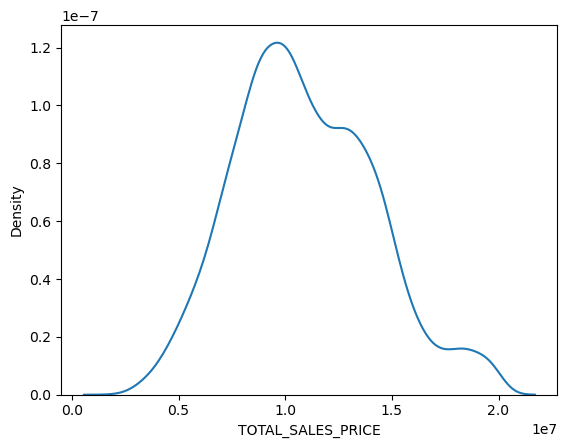

In [144]:
# checking distribution of Sales price
sns.kdeplot(df10['TOTAL_SALES_PRICE'])

<Axes: xlabel='INT_SQFT', ylabel='Density'>

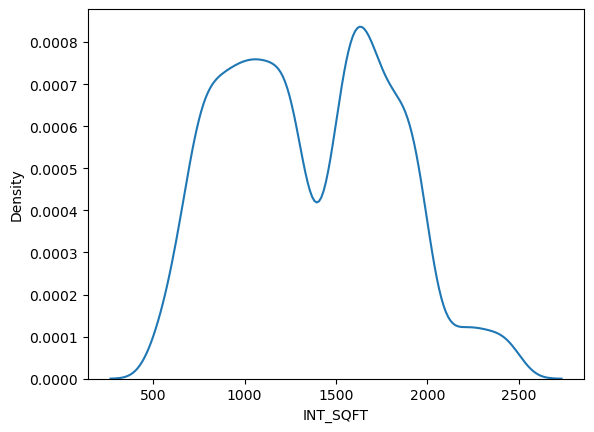

In [145]:
# checking distribution of INT_SQFT
sns.kdeplot(df10['INT_SQFT'])

<Axes: xlabel='PROP_AGE', ylabel='Density'>

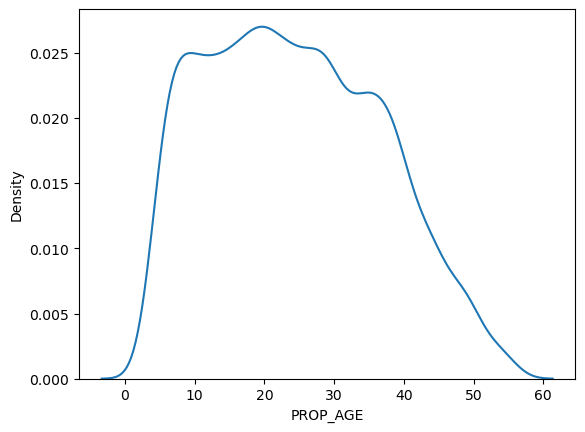

In [146]:
# checking distribution of Property Age
sns.kdeplot(df10['PROP_AGE'])

In [147]:
# To get better accuracy we will standardize our data

In [148]:
X = df10.drop(['TOTAL_SALES_PRICE'], axis = 1)

In [149]:
y = df10['TOTAL_SALES_PRICE']

In [150]:
# Splittig data using train test split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [151]:
# General split 
X_train,X_test,y_train,y_test

(      INT_SQFT  N_BEDROOM  N_BATHROOM  N_ROOM  PROP_AGE  PARK_FACIL_Yes  \
 6586      1269          2           1       4        25               0   
 1886      1543          1           1       4        39               1   
 5017      1645          1           1       4        39               0   
 148        928          1           1       3         4               1   
 6232       787          1           1       2        39               0   
 ...        ...        ...         ...     ...       ...             ...   
 1775      1338          2           2       4         8               1   
 5764       889          1           1       3        23               1   
 6095       956          1           1       3        29               0   
 4605      1900          3           2       5        21               0   
 5316      1555          2           1       4        26               0   
 
       AREA_Anna Nagar  AREA_Chrompet  AREA_KK Nagar  AREA_Karapakkam  ...  \
 6586   

In [152]:
# initializing scaler object

scaler = StandardScaler()


In [153]:
# standardize scaling split data

x_train_std = scaler.fit_transform(X_train)
x_test_std =  scaler.transform(X_test)

In [154]:
# creating scaled dataframe of x_train_std array

x_train_std_df = pd.DataFrame(x_train_std, columns = X_train.columns)

In [155]:
x_train_std_df

INT_SQFT  N_BEDROOM  N_BATHROOM    N_ROOM  PROP_AGE  PARK_FACIL_Yes  \
0    -0.203720   0.455018   -0.529892  0.352164  0.050691       -0.987495   
1     0.400631  -0.785852   -0.529892  0.352164  1.178628        1.012664   
2     0.625608  -0.785852   -0.529892  0.352164  1.178628       -0.987495   
3    -0.955850  -0.785852   -0.529892 -0.637398 -1.641215        1.012664   
4    -1.266848  -0.785852   -0.529892 -1.626960  1.178628       -0.987495   
...        ...        ...         ...       ...       ...             ...   
5081 -0.051529   0.455018    1.887176  0.352164 -1.318947        1.012664   
5082 -1.041870  -0.785852   -0.529892 -0.637398 -0.110443        1.012664   
5083 -0.894091  -0.785852   -0.529892 -0.637398  0.372959       -0.987495   
5084  1.188051   1.695888    1.887176  1.341726 -0.271577       -0.987495   
5085  0.427099   0.455018   -0.529892  0.352164  0.131258       -0.987495   

      AREA_Anna Nagar  AREA_Chrompet  AREA_KK Nagar  AREA_Karapakkam  ...  \
0           -0.316091       1.714521      -0.414595        -0.496249  ...   
1           -0.316091      -0.583253      -0.414595        -0.496249  ...   
2            3.163646      -0.583253      -0.414595        -0.496249  ...   
3           -0.316091       1.714521      -0.414595        -0.496249  ...   
4           -0.316091      -0.583253      -0.414595        -0.496249  ...   
...               ...            ...            ...              ...  ...   
5081        -0.316091      -0.583253      -0.414595         2.015117  ...   
5082        -0.316091       1.714521      -0.414595        -0.496249  ...   
5083        -0.316091       1.714521      -0.414595        -0.496249  ...   
5084        -0.316091      -0.583253      -0.414595        -0.496249  ...   
5085        -0.316091      -0.583253      -0.414595        -0.496249  ...   

      SALE_COND_AdjLand  SALE_COND_Family  SALE_COND_Normal Sale  \
0             -0.493478         -0.492554              -0.495326   
1             -0.493478         -0.492554              -0.495326   
2             -0.493478          2.030235              -0.495326   
3             -0.493478         -0.492554              -0.495326   
4              2.026432         -0.492554              -0.495326   
...                 ...               ...                    ...   
5081          -0.493478          2.030235              -0.495326   
5082          -0.493478         -0.492554               2.018873   
5083           2.026432         -0.492554              -0.495326   
5084          -0.493478         -0.492554               2.018873   
5085          -0.493478         -0.492554               2.018873   

      SALE_COND_Partial  BUILDTYPE_House  BUILDTYPE_Others  STREET_NoAccess  \
0              1.945398        -0.754820         -0.735354        -0.636679   
1              1.945398        -0.754820         -0.735354        -0.636679   
2             -0.514034         1.324819         -0.735354         1.570649   
3              1.945398        -0.754820         -0.735354        -0.636679   
4             -0.514034        -0.754820          1.359890        -0.636679   
...                 ...              ...               ...              ...   
5081          -0.514034        -0.754820          1.359890        -0.636679   
5082          -0.514034        -0.754820         -0.735354        -0.636679   
5083          -0.514034        -0.754820          1.359890        -0.636679   
5084          -0.514034         1.324819         -0.735354         1.570649   
5085          -0.514034        -0.754820         -0.735354         1.570649   

      STREET_Paved  UTILITY_ELO  UTILITY_NoSewa  
0         1.342462    -0.513728        0.943400  
1        -0.744900    -0.513728        0.943400  
2        -0.744900    -0.513728       -1.059996  
3        -0.744900    -0.513728       -1.059996  
4        -0.744900    -0.513728        0.943400  
...            ...          ...             ...  
5081      1.342462    -0.513728        0

In [156]:
x_train_std_df.columns

Index(['INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'PROP_AGE',
       'PARK_FACIL_Yes', 'AREA_Anna Nagar', 'AREA_Chrompet', 'AREA_KK Nagar',
       'AREA_Karapakkam', 'AREA_T Nagar', 'AREA_Velachery',
       'SALE_COND_AdjLand', 'SALE_COND_Family', 'SALE_COND_Normal Sale',
       'SALE_COND_Partial', 'BUILDTYPE_House', 'BUILDTYPE_Others',
       'STREET_NoAccess', 'STREET_Paved', 'UTILITY_ELO', 'UTILITY_NoSewa'],
      dtype='object')

<Axes: >

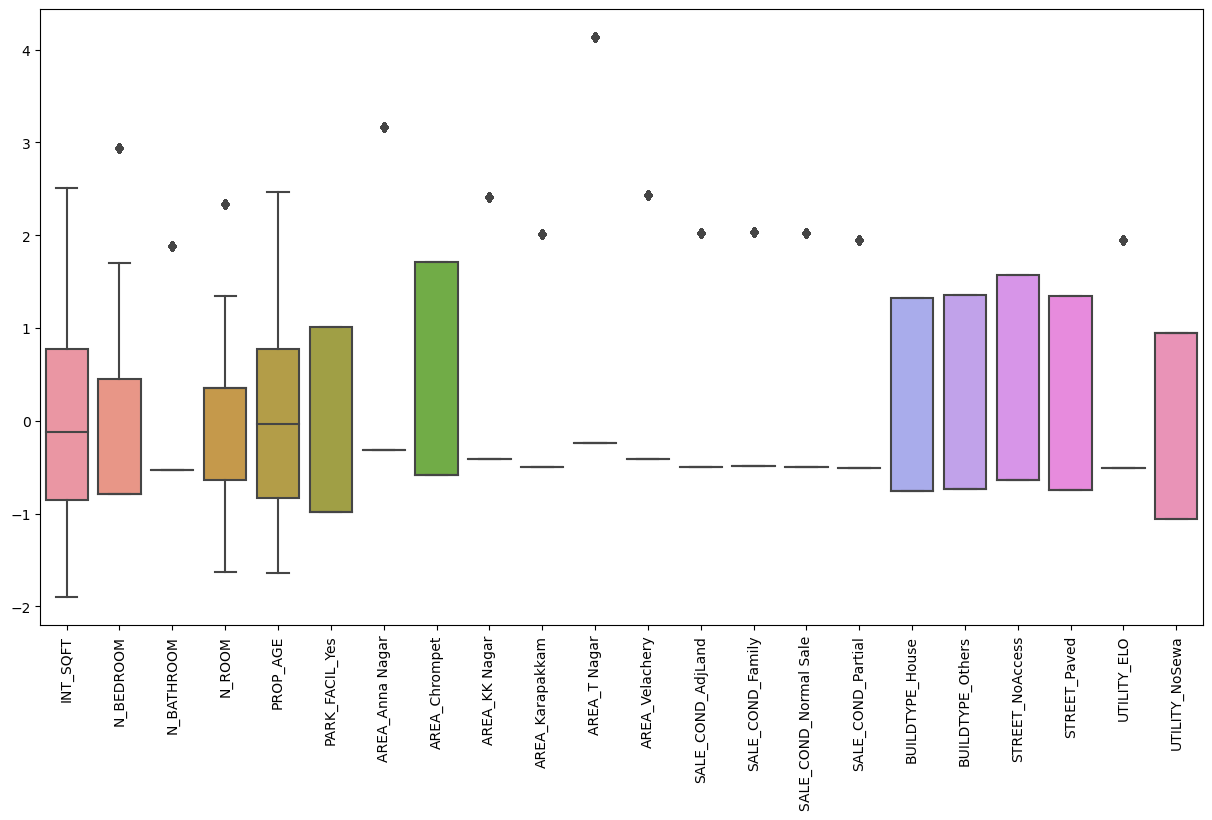

In [157]:
# checking outliers in standard scaled data

fig = plt.figure(figsize =(15,8))
plt.xticks(rotation=90)
sns.boxplot(data = x_train_std_df)

### Model without scaling

In [158]:
# linear model object

lr = LinearRegression()
# training model
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(f"Linear Regr-R2 Score without Standard scaling ={r2_score(y_test,y_pred)}")    

Linear Regr-R2 Score without Standard scaling =0.9085312140334688


### Model after standardscaling

In [159]:
# linear model object

lr2 = LinearRegression()
# training model
lr2.fit(x_train_std, y_train)
y_pred_ss = lr2.predict(x_test_std)
print(y_pred_ss,'\n')
print(f"Linear Regr-R2 Score after Standard scaling : {r2_score(y_test,y_pred_ss)}")   


[ 8599361.24764946  9641225.13993502  7538217.37619138 ...
 13364801.02803941 10392013.47079709 11509225.44225706] 

Linear Regr-R2 Score after Standard scaling : 0.9085312140334687


##### In case of Linear Regression - all scores are same , we did not get any benefit afte scaling even

#

### Model building using Lasso Reg without scaling

In [160]:
# finding alpha value of lasso equation

lassocv = LassoCV(cv=5, random_state=0, max_iter  = 1000)
lassocv.fit(X_train, y_train)
lassocv.alpha_

901224.7223429865

In [161]:
# fitting lasso to data

lasso_G = Lasso(alpha=lassocv.alpha_)
lasso_G.fit(X_train, y_train)
y_pred = lasso_G.predict(X_test)
model_score = r2_score(y_test,y_pred)
print(' Lasso model score :', model_score)

 Lasso model score : 0.40146541011920533


### Model building using Lasso Reg with Standardscaling

In [162]:
# finding alpha value of lasso equation

lassocv = LassoCV(cv=5, random_state=0, max_iter  = 1000)
lassocv.fit(x_train_std, y_train)
lassocv.alpha_

1987.7946309608358

In [163]:
# fitting lasso to data

lasso_SS = Lasso(alpha=lassocv.alpha_)
lasso_SS.fit(x_train_std, y_train)
y_pred = lasso_SS.predict(x_test_std)
lasso_SS_score = r2_score(y_test,y_pred)
print(' Lasso model score after standard scaling :', lasso_SS_score)

 Lasso model score after standard scaling : 0.9085817705935827


### Model building using Ridge Reg without scaling

In [164]:
# finding alpha value of ridge equation

ridgecv =RidgeCV( alphas= np.random.uniform(0,10,50), cv= 10)
ridgecv.fit(X_train,y_train)
ridgecv.alpha_

0.8074073530237569

In [165]:
# fitting ridge to data

ridge_G = Ridge(alpha = ridgecv.alpha_)
ridge_G.fit(X_train,y_train)
y_pred = ridge_G.predict(X_test)
ridge_score = r2_score(y_test,y_pred)
print(' ridge model score before standard scaling :', ridge_score)

 ridge model score before standard scaling : 0.9085576687381396


### Model building using Ridge Reg with Standard scaling

In [166]:
# finding alpha value of ridge equation

ridgecv =RidgeCV( alphas= np.random.uniform(0,10,50), cv= 10)
ridgecv.fit(x_train_std,y_train)
ridgecv.alpha_

3.3276591941795317

In [167]:
# fitting ridge to data

ridge_SS = Ridge(alpha = ridgecv.alpha_)
ridge_SS.fit(x_train_std,y_train)
y_pred = ridge_SS.predict(x_test_std)
ridge_SS_score = r2_score(y_test,y_pred)
print(' ridge model score after standard scaling :', ridge_score)

 ridge model score after standard scaling : 0.9085576687381396


### Model building using Elasticnet Reg without scaling

In [168]:
# finding alpha and l1_ration value of elasticnet equation

elastic=ElasticNetCV(l1_ratio = 0.5, cv = 10, max_iter = 10000, random_state= 100)
elastic.fit(X_train,y_train)
elastic.alpha_, elastic.l1_ratio

(1802449.4446859732, 0.5)

In [169]:
# fitting elasticnet to data

elastic_G = ElasticNet(alpha=elastic.alpha_,l1_ratio = elastic.l1_ratio)
elastic_G.fit(X_train, y_train)
y_pred = elastic_G.predict(X_test)
elastic_score = r2_score(y_test,y_pred)
print(' elastic model score before standard scaling :',elastic_score)

 elastic model score before standard scaling : 0.1217902941342065


### Model building using Elasticnet Reg with Standard scaling

In [170]:
# finding alpha and l1_ration value of elasticnet equation

elastic=ElasticNetCV(l1_ratio = 0.5, cv = 10, max_iter = 10000)
elastic.fit(x_train_std,y_train)
elastic.alpha_, elastic.l1_ratio

(3975.589261921672, 0.5)

In [171]:
# fitting elasticnet to data

elastic_SS = ElasticNet(alpha=elastic.alpha_,l1_ratio = elastic.l1_ratio)
elastic_SS.fit(x_train_std, y_train)
y_pred = elastic_SS.predict(x_test_std)
elastic_SS_score = r2_score(y_test,y_pred)
print(' elastic model score after standard scaling :',elastic_SS_score)

 elastic model score after standard scaling : 0.0006295647893912459


#### Lasso, ridge and Linear regression with standard scaling is giving accuracy score of 90.4%

#

### Model building Using Decision tree withou scaling

In [172]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print('DT Score : ', r2_score(y_test,y_pred))

DT Score :  0.8592234429844348



### Model building Using Decision tree after scaling

In [173]:
reg = DecisionTreeRegressor()
reg.fit(x_train_std,y_train)
y_pred = reg.predict(x_test_std)
print('DT Score after scaling : ', r2_score(y_test,y_pred))

DT Score after scaling :  0.8552945088877152



### Model building Using Random Forest without scaling

In [174]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=100,max_depth=15)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print('RF score : ',r2_score(y_test,y_pred))

RF score :  0.9217300394571311



### Model building Using Random Forest after scaling

In [175]:
reg = RandomForestRegressor(n_estimators=100,max_depth=15)
reg.fit(x_train_std,y_train)
y_pred = reg.predict(x_test_std)
print('RF score afer scaling : ',r2_score(y_test,y_pred))

RF score afer scaling :  0.9214134542512772


In [176]:
# checking predicted value as per random forest model

reg.predict(X_test[5:8])


C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


array([18749374.69      , 19371255.54      , 15660019.69430952])

In [177]:
# actual value of data

y_test[5:8]

3028    12807413
363     15234515
3805    10382747
Name: TOTAL_SALES_PRICE, dtype: int64

In [179]:
filename = 'Chennai_House_Price_model.pickle'
pickle.dump(reg, open(filename, 'wb'))

###  91.7% Score from Random Forest model - hence we will choose this